#

# Сборный проект 1 - Исследовательский анализ российского кинопроката
<a id='head'></a>

## Цель исследования

Цель исследования: Выявить текущие тренды кинопроката. В частности, узнать какие фильмы, снятые с участием госфинансирования, популярны у российского зрителя.

## План работ

1. Загрузить и объеденить данные.
2. Найти и проанализировть пропущенные значения и аномалия.
3. Преобразовать типы данных, где это необходимо.
4. Провести анализ признаков (существующих и новых).
5. Проанализировать кинопрокат с гос. финансированием.
6. Сделать общий вывод.

## Исследование данных о российском кинопрокате



### Загрузка библиотек

In [1]:
!pip install missingno -q

In [2]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18,9)

pd.set_option('display.max_columns', None)

### Загрузка данных

In [ ]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [6]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


При попытке перевести столбец `puNumber` в тип `int` появилась ошибка, что невозможно перевести значение `нет` в данный тип. 

In [7]:
df_movies[df_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Фильм с отстутвующим номером прокатного удостоверения всего один. Кроме этого, у него осттвуют данные по бюджету и сборам. Для ответа на вопрос по проекту, данная строка не имеет ценности.

In [8]:
df_movies = df_movies.drop(df_movies[df_movies['puNumber'] == 'нет'].index)

In [9]:
df_movies['puNumber'] = df_movies['puNumber'].astype('int')

In [10]:
main_df = df_movies.merge(df_shows, on='puNumber', how='outer')

In [11]:
main_df = main_df.rename(columns={'puNumber': 'pu_number'})

In [12]:
main_df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В датасете всего 7485 строк и 16 колонок.

Пропусков нет в следующих признаках: `title`, `pu_number`, `show_start_date`, `type`, `age_restriction`.

Категориальных признков 11, количественных 5.

### Предобработка данных

In [14]:
main_df.dtypes

title                     object
pu_number                  int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

In [15]:
main_df[main_df['ratings'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14T12:00:00.000Z,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25T12:00:00.000Z,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28T12:00:00.000Z,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
main_df['ratings'] = main_df['ratings'].str.strip('%').astype('float')

In [17]:
main_df['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [18]:
main_df.update(main_df[main_df['ratings'] > 10]['ratings']/10)
main_df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [19]:
main_df.dtypes

title                     object
pu_number                  int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                  float64
genres                    object
box_office               float64
dtype: object

In [20]:
main_df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [21]:
main_df['show_start_date'] = pd.to_datetime(main_df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Изучение пропусков в датафрейме

In [22]:
def data_vol_check():
    print('Коли-во строк в источнике: {}'.format(main_df.shape[0]))
    print('Коли-во строк после фильтрации: {}'.format(model_df.shape[0]))
    print('Доля строк после фильтрации: {}%'.format(round((model_df.shape[0]/main_df.shape[0])*100, 2)))

In [23]:
for col in main_df.columns:
    pct_missing = np.mean(main_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

title - 0%
pu_number - 0%
show_start_date - 0%
type - 0%
film_studio - 0%
production_country - 0%
director - 0%
producer - 8%
age_restriction - 0%
refundable_support - 96%
nonrefundable_support - 96%
budget - 96%
financing_source - 96%
ratings - 13%
genres - 13%
box_office - 58%


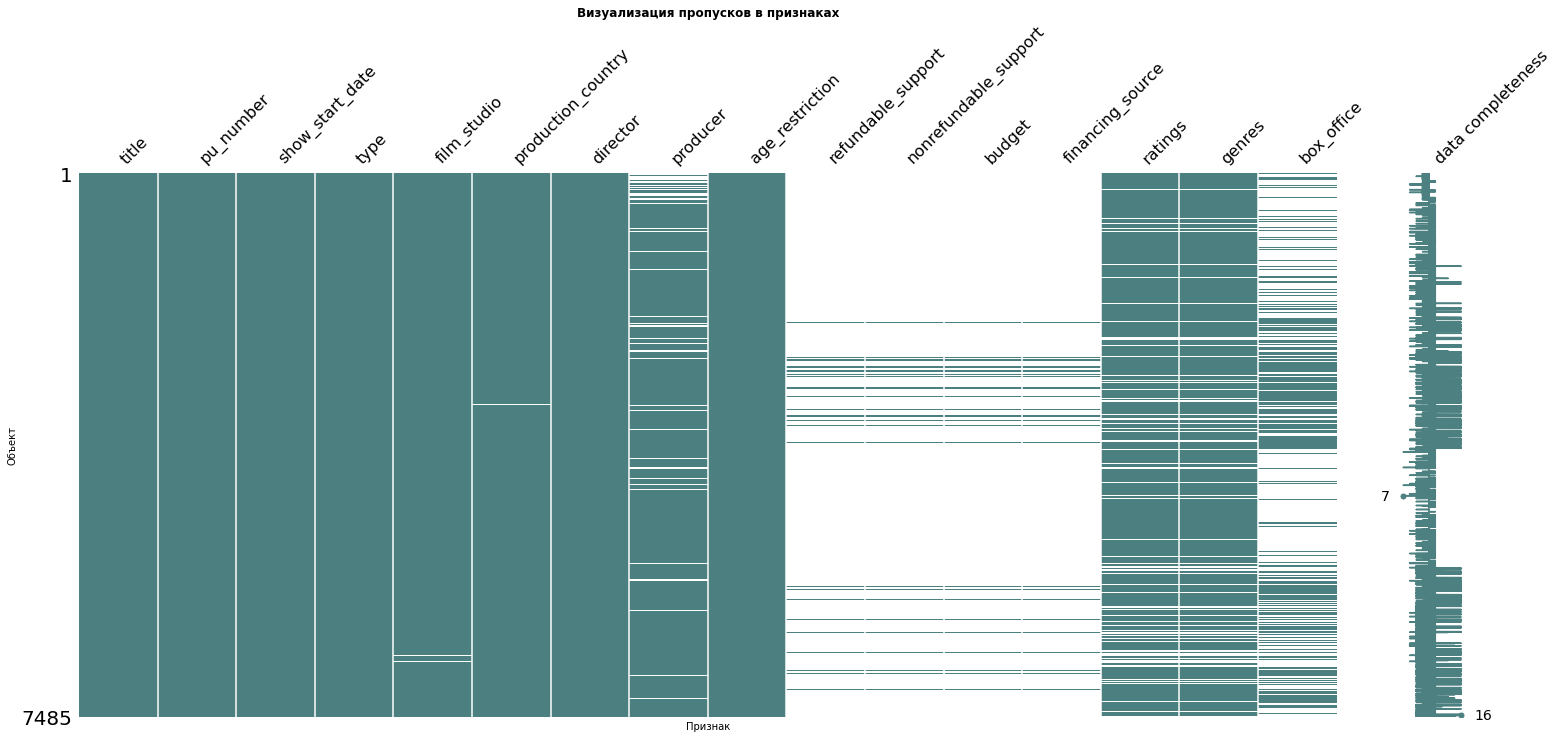

In [24]:
msno.matrix(main_df, labels=True, color=(0.3, 0.5, 0.5))
plt.title('Визуализация пропусков в признаках', weight='bold')
plt.ylabel('Объект')
plt.xlabel('Признак')
plt.show()

Создан индикатор пропуска для: film_studio
Создан индикатор пропуска для: production_country
Создан индикатор пропуска для: director
Создан индикатор пропуска для: producer
Создан индикатор пропуска для: refundable_support
Создан индикатор пропуска для: nonrefundable_support
Создан индикатор пропуска для: budget
Создан индикатор пропуска для: financing_source
Создан индикатор пропуска для: ratings
Создан индикатор пропуска для: genres
Создан индикатор пропуска для: box_office


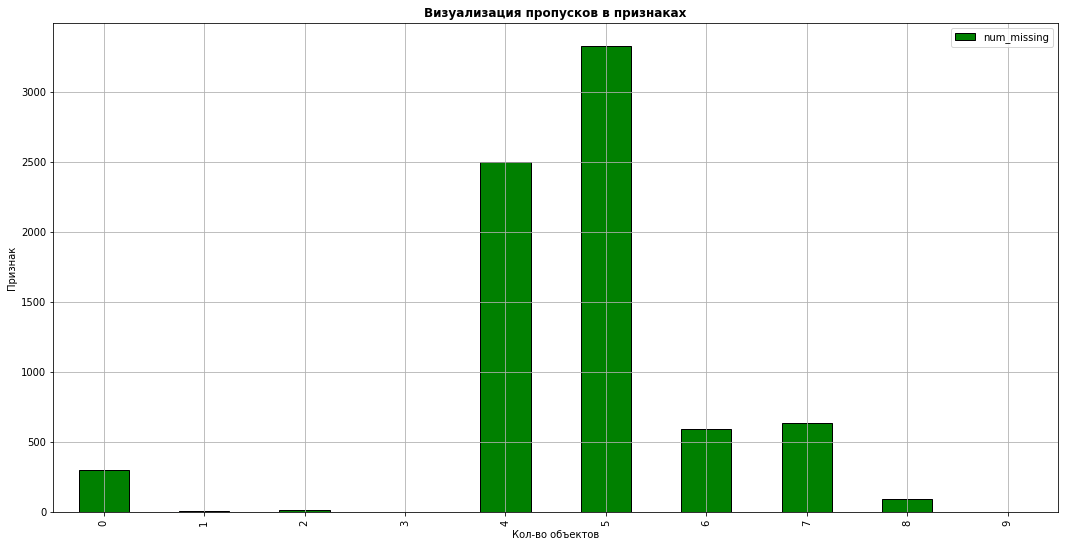

In [25]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in main_df.columns:
    missing = main_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('Создан индикатор пропуска для: {}'.format(col))
        main_df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in main_df.columns if 'ismissing' in col]
main_df['num_missing'] = main_df[ismissing_cols].sum(axis=1)

main_df['num_missing'].value_counts().reset_index().sort_values(by='index').plot(kind='bar', x='index', y='num_missing',
                                                                                 edgecolor='black', color='green', grid=True)
plt.title('Визуализация пропусков в признаках', weight='bold')
plt.ylabel('Признак')
plt.xlabel('Кол-во объектов')
plt.show()

Удалим строки, где кол-во пропущенных значение больше 8.

In [26]:
print(len(main_df[main_df['num_missing'] >= 8]) / len(main_df))

0.012959251837007349


In [27]:
ind_missing = main_df[main_df['num_missing'] >= 8].index
model_df = main_df.drop(ind_missing, axis=0)

In [28]:
data_vol_check()

Коли-во строк в источнике: 7485
Коли-во строк после фильтрации: 7388
Доля строк после фильтрации: 98.7%


In [29]:
main_df[main_df['film_studio'].isna()]['title'].count()

18

Удаляю строки где есть одновременно пропуски в столбцах `film_studio`, `ratings`, `box_office`.

In [30]:
model_df = model_df.dropna(subset=['film_studio', 'ratings', 'box_office'], how='all').reset_index(drop=True)

In [31]:
model_df[model_df['film_studio'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
1271,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN,True,False,False,False,True,True,True,True,False,False,True,6
6311,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0,True,False,False,False,True,True,True,True,True,True,False,7
6395,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN,True,False,False,False,True,True,True,True,False,False,True,6
6406,В плену города грёз,112014818,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,В.Витовцев,О.Мичи,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,триллер",NaN,True,False,False,False,True,True,True,True,False,False,True,6
6565,Топливо,111001419,2019-02-12 12:00:00+00:00,Художественный,NaN,Россия,М.Архипов,М.Архипов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.1,"короткометражка,фантастика",NaN,True,False,False,False,True,True,True,True,False,False,True,6


Я решил удалить строки только с отсутствующими значениямм в признаках `film_studio`, `ratings` и `box_office`, так как считаю, что без значений в последних двух столбцах сложно будет ответить на вопрос, какие фильмы интересны зрителям.

In [32]:
model_df['film_studio'].fillna(value='неизвестно', inplace=True)

In [33]:
data_vol_check()

Коли-во строк в источнике: 7485
Коли-во строк после фильтрации: 7388
Доля строк после фильтрации: 98.7%


In [34]:
model_df[model_df['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
3134,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0,False,True,False,False,True,True,True,True,False,False,False,5


В столбце `production_country` осталось 1 пропущенное значение. Заполнить их можно по информации из других источников, например kinopoisk.

In [35]:
model_df['production_country'].fillna(value='Россия', inplace=True)
model_df[model_df['production_country'].isna()]['production_country'].count()

0

In [36]:
model_df[model_df['director'].isna()]['title'].count()

3

Пропусков в столбце `director` всего 3,  заполню значением `неизвестно`, но это никак не повлияет на ответ на вопрос задания. 

In [37]:
model_df['director'].fillna(value='неизвестно', inplace=True)

In [38]:
round(len(model_df[model_df['producer'].isna()]) / len(model_df) * 100, 2)

6.56

Доля строк с пропущенным значением в столбце `producer` составляет 6.6%, что довольно высокое значение чтобы от них избавиться. Заполню пропуски значением `неизвестно`.

In [39]:
model_df['producer'].fillna(value='неизвестно', inplace=True)

In [40]:
model_df[model_df['producer'].isna()]['title'].count()

0

В столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` отсутствует 96% данных. Оставшиеся 4% фильмов финансировалось за счет государства. В количественных столбцах пропуски оставлю. В столбце `financing_source` пропуски заполню на `неизвестно`.

In [41]:
model_df['financing_source'].fillna(value='неизвестно', inplace=True)

In [42]:
round(len(model_df.loc[(model_df['genres'].isna())]) / len(model_df), 2)

0.12

In [43]:
model_df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Пропуски в столбце `genres` заполняю значением `неизвестно`. 

In [44]:
model_df['genres'].fillna(value='неизвестно', inplace=True)
model_df['genres'].isna().sum()

0

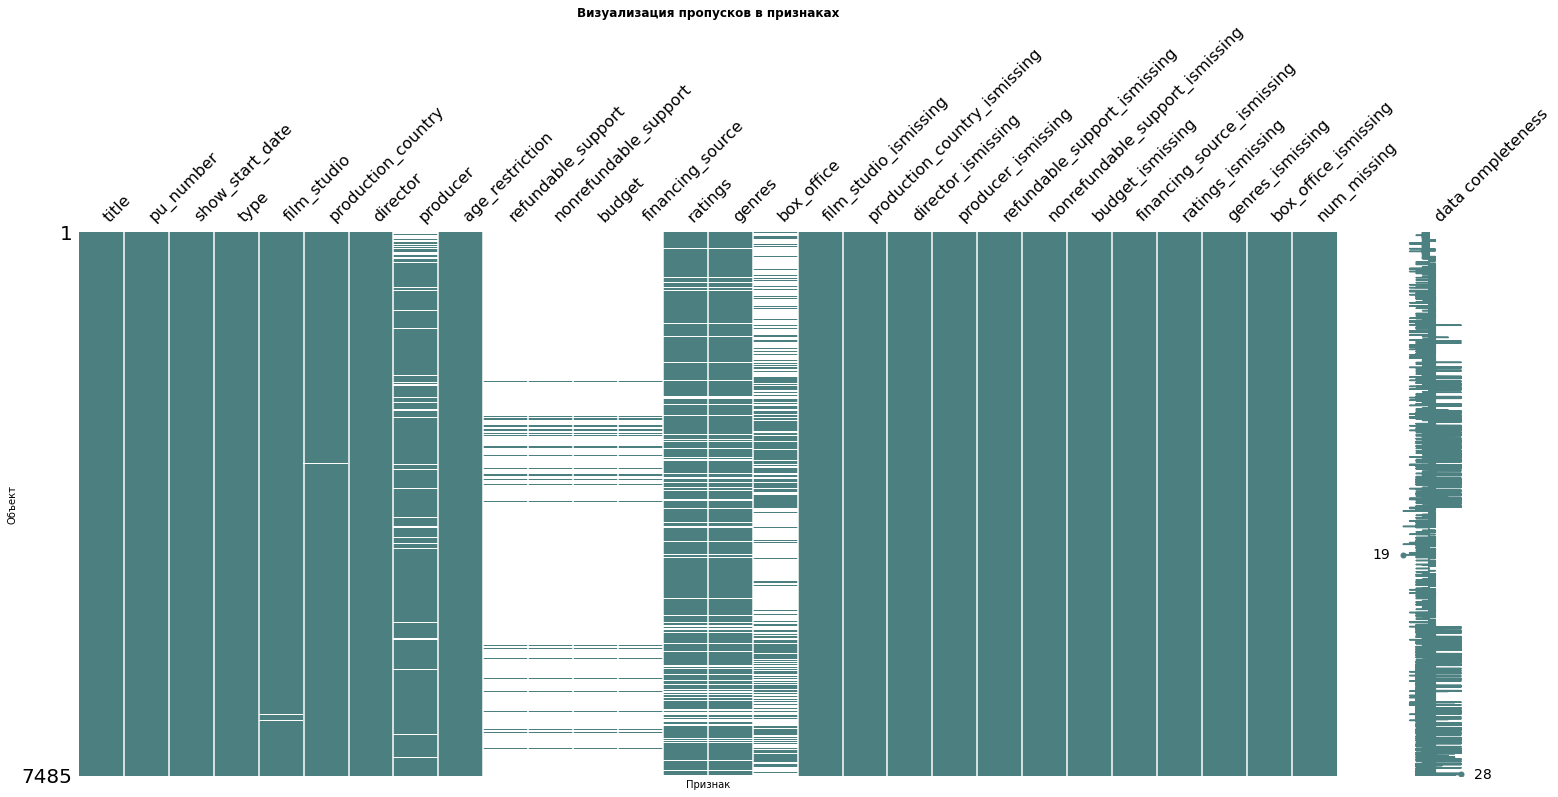

In [45]:
msno.matrix(main_df, labels=True, color=(0.3, 0.5, 0.5))
plt.title('Визуализация пропусков в признаках', weight='bold')
plt.ylabel('Объект')
plt.xlabel('Признак')
plt.show()

In [46]:
model_df['ratings'].isna().sum()

870

Заполним отсутствующие значения в столбце `ratings`, по медианному значению рейтинга фильмов конкретного режиссера и жанра.

In [47]:
model_df['ratings'] = model_df.groupby(['director', 'genres'])['ratings'].transform(
    lambda x: x.fillna(x.median() if x.notna().any() else np.nan))

In [48]:
model_df['ratings'].isna().sum()

868

Пропусков стало на 2 меньше. Вернусь к этому методу, когда вычленю основного режиссера и жанр фильма.

Столбец `box_office` оставлю без изменений, так как нет логического способа заполнить пропуски.

#### Изучение дубликатов в датафрейме

Дубликаты я буду проверять по столбцу `pu_number`. Номер прокатного удостоверения - это единственный признак, который должен быть уникальным в настоящем наборе данных.

In [49]:
model_df['pu_number'].duplicated().sum()

2

In [50]:
model_df['pu_number'].value_counts(ascending=False)

221154310    2
221054410    2
122001411    1
121000719    1
221027110    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: pu_number, Length: 7386, dtype: int64

In [51]:
model_df[model_df['pu_number'] == 221154310]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
4566,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.0,"мелодрама,комедия",NaN,False,False,False,False,True,True,True,True,False,False,True,5
4567,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.6,"драма,мелодрама,история",NaN,False,False,False,False,True,True,True,True,False,False,True,5


In [52]:
model_df[model_df['pu_number'] == 221054410]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
4993,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.4,"комедия,криминал",NaN,False,False,False,False,True,True,True,True,False,False,True,5
4994,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,6.8,"комедия,криминал",NaN,False,False,False,False,True,True,True,True,False,False,True,5


In [53]:
model_df[model_df['title'] == 'Как жениться и остаться холостым']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
4448,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.0,"мелодрама,комедия",NaN,False,False,False,False,True,True,True,True,False,False,True,5
4566,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.0,"мелодрама,комедия",NaN,False,False,False,False,True,True,True,True,False,False,True,5


In [54]:
model_df[model_df['title'] == 'Анализируй это!']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
4481,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.4,"комедия,криминал",NaN,False,False,False,False,True,True,True,True,False,False,True,5
4993,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.4,"комедия,криминал",NaN,False,False,False,False,True,True,True,True,False,False,True,5


In [55]:
model_df[model_df['title'] == 'Анализируй то!']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
4994,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,6.8,"комедия,криминал",NaN,False,False,False,False,True,True,True,True,False,False,True,5


Фильмы с одним названием имеют по два номера. Оставлю в данных те, у которых номер встретится второй раз. Ошибка моглы быть вызвана человеческим фактором, когда заполнялись данные.

In [56]:
model_df = model_df.drop_duplicates(subset=['pu_number'], keep='last').reset_index(drop=True)

In [57]:
model_df['pu_number'].duplicated().sum()

0

In [58]:
data_vol_check()

Коли-во строк в источнике: 7485
Коли-во строк после фильтрации: 7386
Доля строк после фильтрации: 98.68%


#### Изучение категориальных значений


In [59]:
# отбор нечисловых колонок
df_non_numeric = model_df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
non_numeric_cols

array(['title', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'financing_source', 'genres', 'film_studio_ismissing',
       'production_country_ismissing', 'director_ismissing',
       'producer_ismissing', 'refundable_support_ismissing',
       'nonrefundable_support_ismissing', 'budget_ismissing',
       'financing_source_ismissing', 'ratings_ismissing',
       'genres_ismissing', 'box_office_ismissing'], dtype=object)

In [60]:
model_df['title'].value_counts().head(50)

День святого Валентина_                                        5
Кошмар на улице Вязов /Фильм ужасов/                           4
Дом грёз                                                       4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Белоснежка и охотник                                           4
Дитя тьмы                                                      4
Химера                                                         4
Код доступа "Кейптаун"                                         4
Кошки против собак: Месть Китти Галор                          4
Начало_                                                        4
Прощание                                                       4
Секс в большом городе 2                                        4
Знакомство с Факерами 2.                                       4
Красавчик-2                                                    4
Робин Гуд (Robin Hood)                                         4
Двойной копец            

In [61]:
model_df['type'].value_counts().head(50)

Художественный                4490
 Художественный               1384
Анимационный                   826
Прочие                         361
Документальный                 274
Научно-популярный               49
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [62]:
model_df['film_studio'].value_counts().head(50)

Киностудия "Мосфильм"                                                               332
ООО "Мульт в кино"                                                                   57
Анимаккорд Лтд                                                                       23
ООО "Мульт в кино"                                                                   18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                               16
ООО "ТаББаК"                                                                         15
ООО "Студия анимационного кино "Мельница"                                            14
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                                         13
ООО "Кинокомпания "СТВ"                                                              13
ЗАО "Аэроплан"                                                                       12
Р А И Синема                                                                         12
Опус Арте                       

In [63]:
model_df['production_country'].value_counts().head(50)

США                               2171
Россия                            1794
СССР                               333
Франция                            300
Великобритания                     229
Италия                             116
Германия                           109
США - Великобритания                88
Япония                              77
Испания                             74
Франция - Бельгия                   55
Канада                              52
Австралия                           48
США - Канада                        44
Великобритания - США                40
КНР                                 33
Республика Кипр                     31
США - Германия                      29
США - Франция                       29
США-Австралия                       28
Южная Корея                         25
США - Австралия                     22
Индия                               22
СССР                                20
США-Германия                        19
Норвегия                 

In [64]:
model_df['director'].value_counts().head(20)

О.Семёнова          47
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         16
Тиль Швайгер        14
Клинт Иствуд        13
Питер Джексон       13
Вуди Аллен          13
Дэвид Финчер        12
О.Семёнова          12
Стивен Спилберг     12
Люк Бессон          12
Кевин Смит          12
Саймон Уэст         11
П.Смирнов           11
Гай Ричи            11
Кристофер Нолан     11
Л.Гайдай            10
С.Андреасян         10
Роберт Швентке      10
Name: director, dtype: int64

In [65]:
model_df['producer'].value_counts().head(20)

неизвестно                                       485
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
Тони Майерс                                       11
Джерри Брукхаймер                                 11
Кевин Фейги                                       11
А.Тельнов                                         11
ООО "Продюсерский центр ЕРАЛАШ"                   10
Н.Мокрицкая                                        9
С.Сельянов, А.Боярский                             9
С.Говорухин, Е.Маскина                             9
Э.Пичугин                                          9
Тиль Швайгер                                       8
Г.Васильев, М.Мэннис, И.Попов                      8
Б.Машковцев, С.Струсовский                         8
ФГУП "Киноконцерн "Мосфильм"                       8
А.Герасимов                                   

In [66]:
model_df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2842
«18+» - запрещено для детей               1602
«12+» - для детей старше 12 лет           1562
«0+» - для любой зрительской аудитории     764
«6+» - для детей старше 6 лет              616
Name: age_restriction, dtype: int64

In [67]:
model_df['financing_source'].value_counts()

неизвестно                          7054
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

In [68]:
model_df['genres'].value_counts().head(20)

неизвестно                        879
драма                             476
комедия                           352
мелодрама,комедия                 221
драма,мелодрама,комедия           189
драма,мелодрама                   183
драма,комедия                     158
триллер,драма,криминал            141
боевик,триллер,драма              140
фантастика,боевик,триллер          88
документальный                     84
мультфильм,комедия,приключения     80
ужасы,триллер                      78
ужасы,триллер,детектив             78
драма,криминал                     75
ужасы                              73
мультфильм,фэнтези,комедия         69
мелодрама                          66
боевик,триллер,криминал            66
триллер,драма                      60
Name: genres, dtype: int64

Самые частые проблемы в категориальных данных:
- В конце названий фильмов стоят ненужные символы (Например: **_**, **.**);
- Нет единого стиля заполнения в описании фильма (Например: где-то уточнения обромляются **//**, где-то **()**);
- В столбце со странами производства, также нет единого стиля заполнения;
- В столбце `type` есть пробелы перед значениями;

In [69]:
model_df['type'] = model_df['type'].str.strip()
model_df['type'].value_counts()

Художественный                5874
Анимационный                   827
Прочие                         361
Документальный                 274
Научно-популярный               49
Музыкально-развлекательный       1
Name: type, dtype: int64

In [70]:
model_df['title'] = model_df['title'].str.rstrip('_')
model_df['title'] = model_df['title'].str.rstrip('.')

#### Изучение количественных значений

In [71]:
# отбор числовых колонок
pd.options.display.float_format = '{:.2f}'.format
df_numeric = model_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['pu_number' 'refundable_support' 'nonrefundable_support' 'budget'
 'ratings' 'box_office' 'num_missing']


In [72]:
len(model_df['budget']), len(model_df['refundable_support']), len(model_df['nonrefundable_support'])

(7386, 7386, 7386)

In [73]:
def numeric_analysis(column):
    stat = model_df[column].describe()
    print(stat)
    up_whisker = stat['75%'] + 1.5 * (stat['75%'] - stat['25%'])
    low_whisker = stat['25%'] - 1.5 * (stat['75%'] - stat['25%'])
    print(f'\nВерхний ус: {round(up_whisker, 2)} \n Нижний ус: {round(low_whisker, 2)}')
    model_df[column].plot(kind='hist', bins=100, edgecolor='black', color='green', grid=True)
    plt.title(f'Гистограмма признака {column}', weight='bold')
    plt.show()
    model_df[column].plot(kind='box', figsize=(10, 5), vert=False)
    plt.title(f'График распределения признака {column}', weight='bold')
    plt.show()

count         332.00
mean     11864457.83
std      24916555.26
min             0.00
25%             0.00
50%             0.00
75%      15000000.00
max     180000000.00
Name: refundable_support, dtype: float64

Верхний ус: 37500000.0 
 Нижний ус: -22500000.0


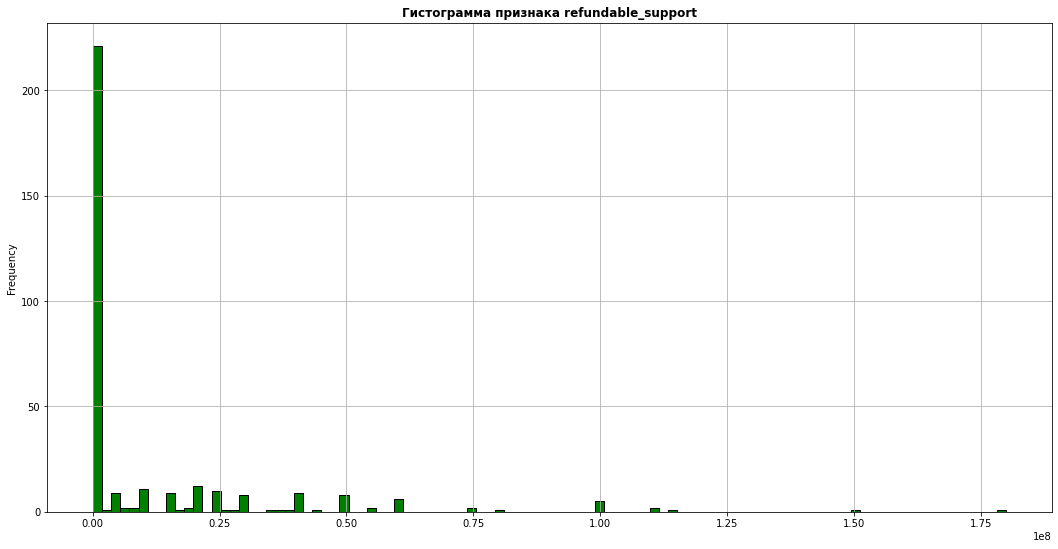

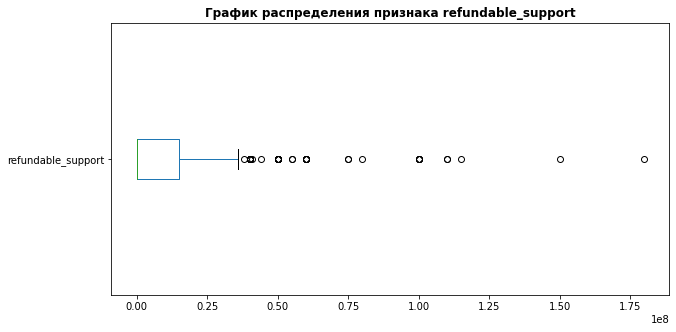

In [74]:
numeric_analysis('refundable_support')

In [75]:
model_df.query('refundable_support > 10**8')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
3112,Герой (2015),111000416,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,110000000.00,30000000.00,222177790.00,"Министерство культуры, Фонд кино",7.10,"мюзикл,боевик,драма",81430626.82,False,False,False,False,False,False,False,False,False,False,False,0
3297,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.00,300000000.00,684200536.00,Фонд кино,6.60,драма,364285139.60,False,False,False,False,False,False,False,False,False,False,False,0
5355,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.00,190000000.00,1032905957.00,Фонд кино,7.70,"фэнтези,комедия,семейный",511775548.00,False,False,False,False,False,False,False,False,False,False,False,0
6381,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,115000000.00,0.00,185500705.00,Фонд кино,6.50,"мультфильм,приключения,семейный",577368853.25,False,False,False,False,False,False,False,False,False,False,False,0
7014,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59,False,False,False,False,False,False,False,False,False,False,False,0


Присутствуют выбросы, но они содреждат фильмы с гос. финансированием. Удалять их не буду, т.к они пригодятся для решения задачи.

count         332.00
mean     48980988.89
std      59980117.92
min             0.00
25%      25000000.00
50%      30000000.00
75%      40375000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

Верхний ус: 63437500.0 
 Нижний ус: 1937500.0


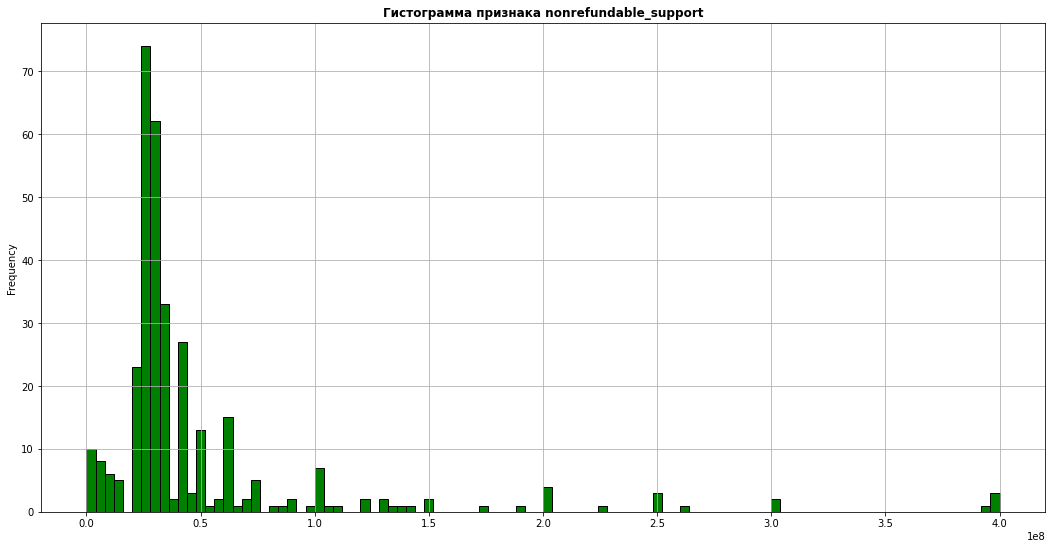

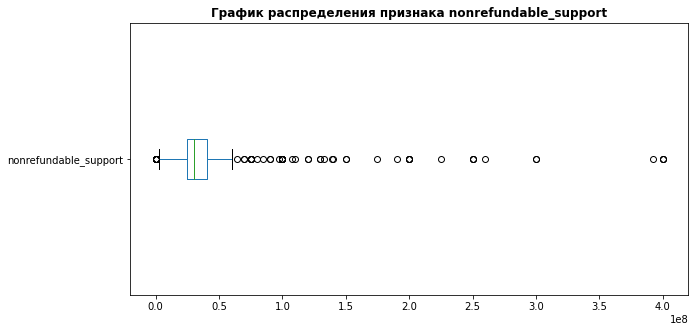

In [76]:
numeric_analysis('nonrefundable_support')

In [77]:
model_df.query('nonrefundable_support > 10**8').head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
1471,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,False,False,False,False,False,False,False,False,False,False,False,0
2527,Смешарики. Легенда о золотом драконе,114002815,2015-10-07 12:00:00+00:00,Анимационный,"ООО ""Смешарики""",Россия,Д.Чернов,"И.Попов, Ф.Бондарчук, Д.Рудовский",«6+» - для детей старше 6 лет,40000000.00,110000000.00,240153900.00,Фонд кино,6.30,"мультфильм,приключения,комедия",242403434.60,False,False,False,False,False,False,False,False,False,False,False,0
2650,Он - Дракон,111017915,2015-10-14 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,И.Джендубаев,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.00,250000000.00,360000000.00,Фонд кино,6.80,фэнтези,110171448.50,False,False,False,False,False,False,False,False,False,False,False,0
2869,Экипаж,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.00,392104482.00,635283867.00,Фонд кино,7.60,"драма,триллер,приключения",1402255390.00,False,False,False,False,False,False,False,False,False,False,False,0
3193,Дама Пик,111012416,2016-08-05 12:00:00+00:00,Художественный,"ООО ""Мастерская Павла Лунгина"". ООО ""Арт Пикче...",Россия,П.Лунгин,"П.Лунгин, Ф.Бондарчук, Д.Рудовский, Е.Панфилов",«16+» - для детей старше 16 лет,17000000.00,133000000.00,226271533.00,"Министерство культуры, Фонд кино",6.00,триллер,30393100.72,False,False,False,False,False,False,False,False,False,False,False,0
3201,Время первых (2017),111001317,2017-02-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,75000000.00,175000000.00,528441977.00,Фонд кино,7.50,"приключения,триллер,биография",544332260.00,False,False,False,False,False,False,False,False,False,False,False,0
3297,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.00,300000000.00,684200536.00,Фонд кино,6.60,драма,364285139.60,False,False,False,False,False,False,False,False,False,False,False,0
3399,Ледокол,111016316,2016-10-11 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,Н.Хомерики,"И.Толстунов, С.Козлов",«12+» - для детей старше 12 лет,100000000.00,200000000.00,430000000.00,Фонд кино,6.50,драма,337069662.80,False,False,False,False,False,False,False,False,False,False,False,0
3408,Защитники,111000717,2017-01-24 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз"", ООО ""РЕНОВАЦИО интертейнмент""",Россия,С.Андреасян,"С.Андреасян, Г.Андреасян, В.Поляков, А.Рязанцев",«12+» - для детей старше 12 лет,50000000.00,150000000.00,323232109.00,Фонд кино,3.00,"фантастика,фэнтези,боевик",262040254.00,False,False,False,False,False,False,False,False,False,False,False,0
3510,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00,False,False,False,False,False,False,False,False,False,False,False,0


Присутствуют выбросы, но они содержат фильмы с гос. финансированием. Удалять их не буду, т.к они пригодятся для решения задачи.

count          332.00
mean     127229716.68
std      188588333.12
min              0.00
25%       42000000.00
50%       68649916.00
75%      141985319.50
max     2305074303.00
Name: budget, dtype: float64

Верхний ус: 291963298.75 
 Нижний ус: -107977979.25


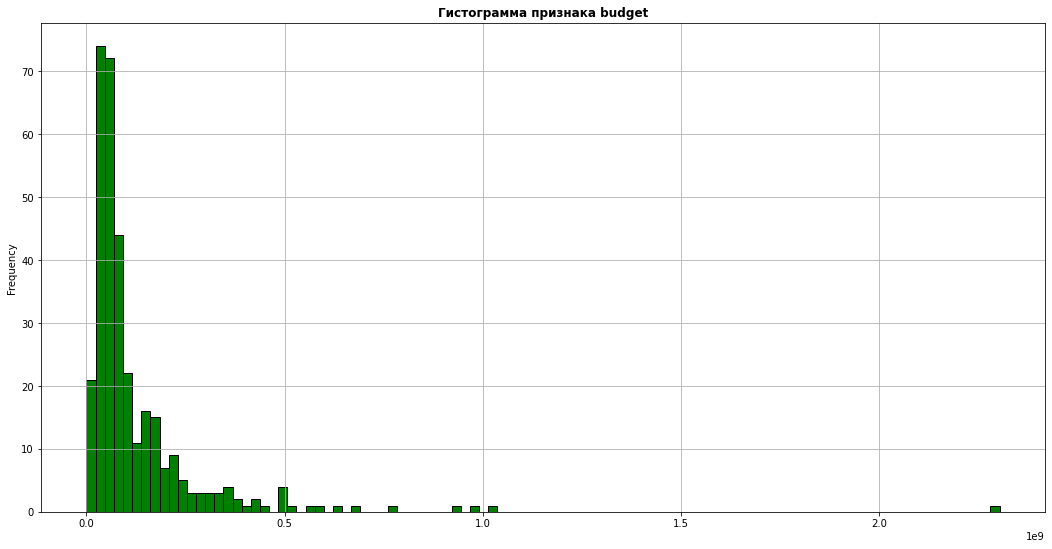

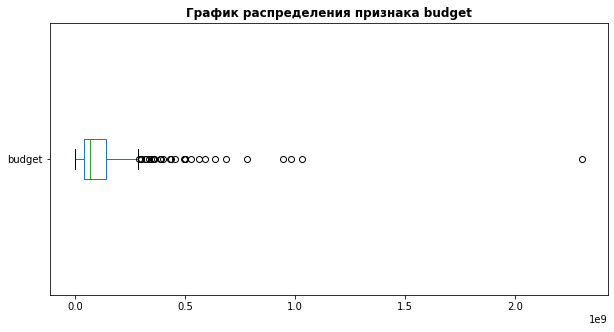

In [78]:
numeric_analysis('budget')

In [79]:
model_df.query('budget > 10**9')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
5355,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.00,190000000.00,1032905957.00,Фонд кино,7.70,"фэнтези,комедия,семейный",511775548.00,False,False,False,False,False,False,False,False,False,False,False,0
7014,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59,False,False,False,False,False,False,False,False,False,False,False,0


Хотя может показаться, что фильм с бюджетом более 2 млрд. это выброс, однако согласно открытм источникам это не так. 

In [80]:
model_df.query('budget < (nonrefundable_support + refundable_support)')['title'].count()

17

В данных есть 17 строк, где не указан бюджет фильма, при этом размер господдержки присутствует. Я считаю, что для будущего анализа целесообразно указать в бюджете сумму возвратных и невозвратных средств, так как скорее всего фильмы полностью финансировались государством.  

In [81]:
model_df.loc[((model_df['nonrefundable_support'] + model_df['refundable_support']) > model_df['budget']), 'budget'] = model_df['nonrefundable_support'] + model_df['refundable_support']

count          332.00
mean     131422395.80
std      187148242.67
min        6000000.00
25%       45524799.50
50%       71196901.50
75%      150000000.00
max     2305074303.00
Name: budget, dtype: float64

Верхний ус: 306712800.75 
 Нижний ус: -111188001.25


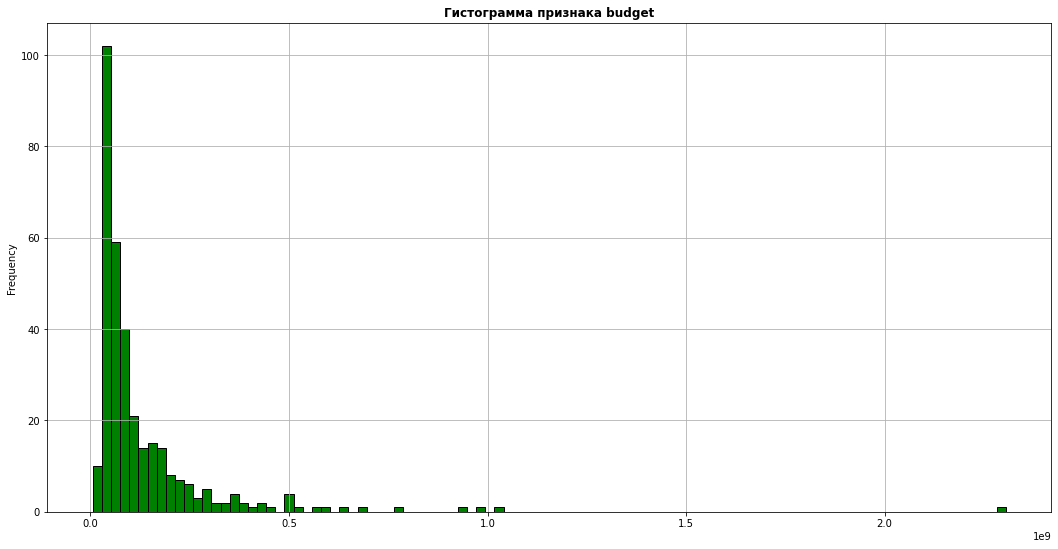

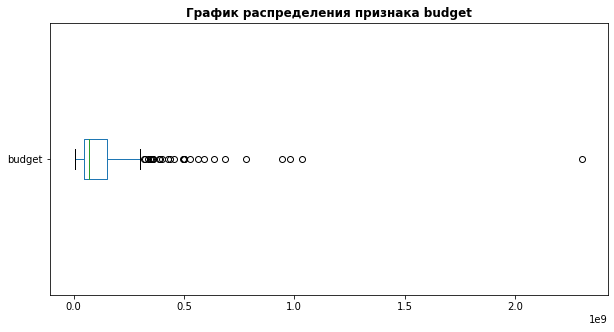

In [82]:
numeric_analysis('budget')

In [83]:
model_df.query('(0.7e9 < budget < 3e9)')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing
5355,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.00,190000000.00,1032905957.00,Фонд кино,7.70,"фэнтези,комедия,семейный",511775548.00,False,False,False,False,False,False,False,False,False,False,False,0
7014,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59,False,False,False,False,False,False,False,False,False,False,False,0
7071,Грех,111014419,2019-08-31 12:00:00+00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.00,60000000.00,779941965.00,Министерство культуры,6.90,"драма,биография,история",54243202.71,False,False,False,False,False,False,False,False,False,False,False,0
7364,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,False,False,False,False,False,False,False,False,False,False,False,0
7374,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,False,False,False,False,False,False,False,False,False,False,True,1


count   6518.00
mean       6.49
std        1.11
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.90
Name: ratings, dtype: float64

Верхний ус: 9.15 
 Нижний ус: 3.95


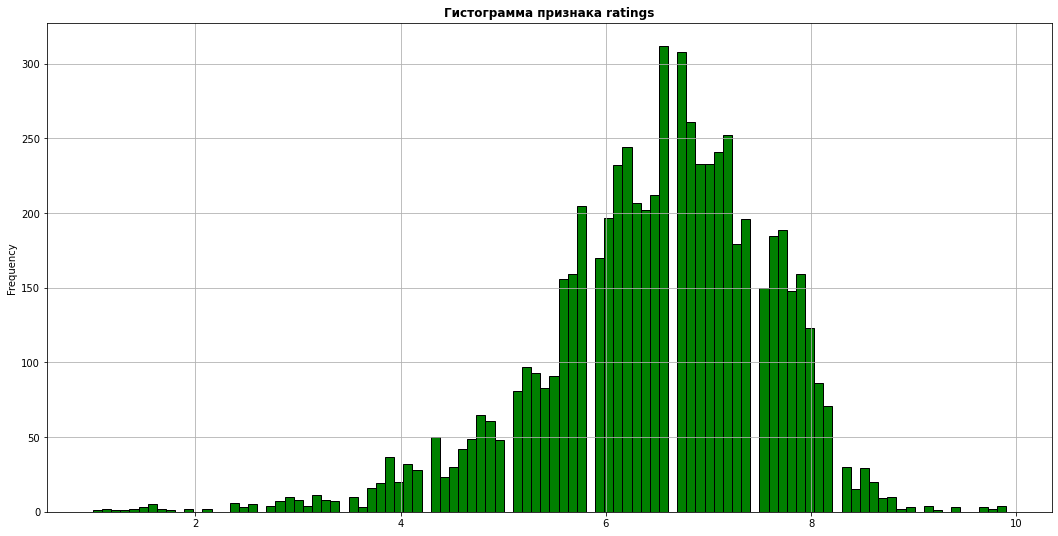

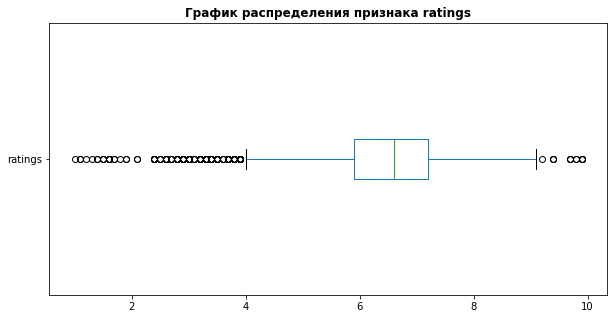

In [84]:
numeric_analysis('ratings')

На графиках присутствуют длинный хвост фильмов с рейтингом меньше 4.

In [85]:
model_df.query('ratings < 4 and refundable_support.notna() and nonrefundable_support.notna()').count()

title                              16
pu_number                          16
show_start_date                    16
type                               16
film_studio                        16
production_country                 16
director                           16
producer                           16
age_restriction                    16
refundable_support                 16
nonrefundable_support              16
budget                             16
financing_source                   16
ratings                            16
genres                             16
box_office                         16
film_studio_ismissing              16
production_country_ismissing       16
director_ismissing                 16
producer_ismissing                 16
refundable_support_ismissing       16
nonrefundable_support_ismissing    16
budget_ismissing                   16
financing_source_ismissing         16
ratings_ismissing                  16
genres_ismissing                   16
box_office_i

В выбросах с рейтингом меньше 4 присутствует большое кол-во фильмов с гос. финансированием. Удалять их нельзя, так как эти данные нужны для решения задачи.

count         3158.00
mean      76478696.16
std      240353122.82
min              0.00
25%          86239.00
50%        2327987.55
75%       23979671.02
max     3073568690.79
Name: box_office, dtype: float64

Верхний ус: 59819819.06 
 Нижний ус: -35753909.04


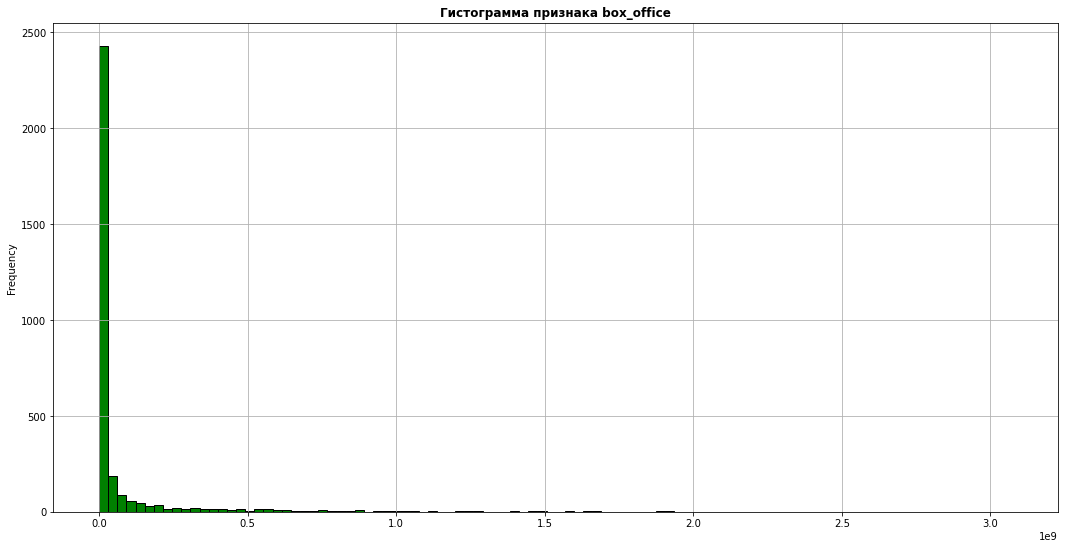

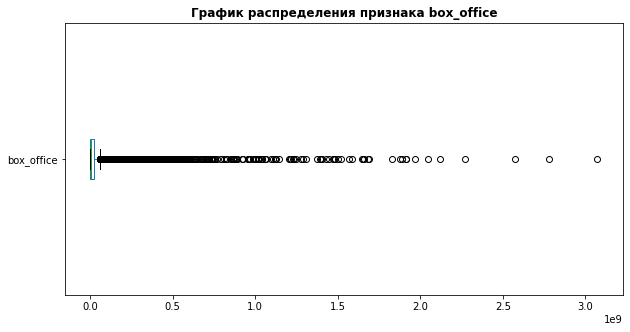

In [86]:
numeric_analysis('box_office')

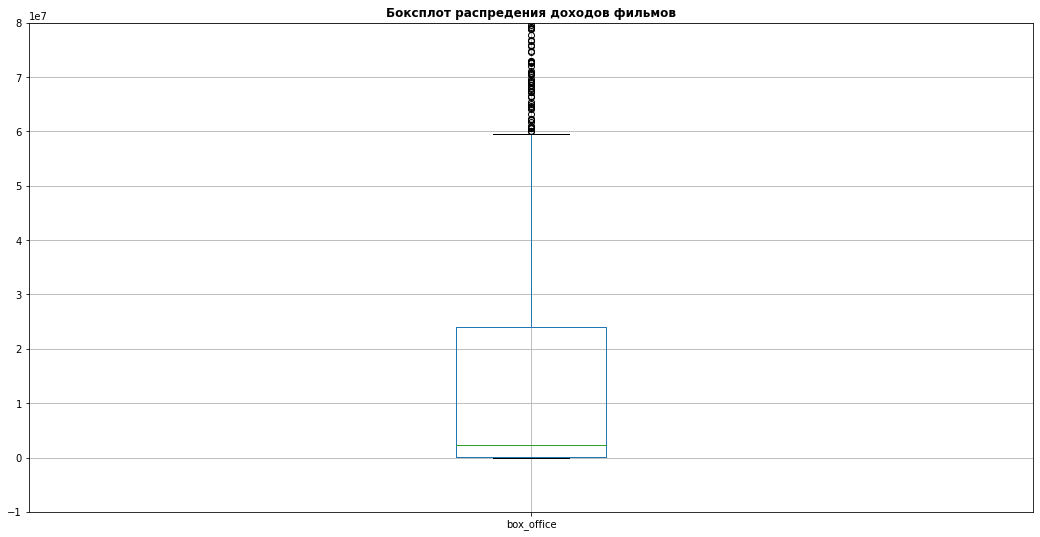

In [87]:
model_df.boxplot('box_office')
plt.ylim(-(10**7), 80000000)
plt.title('Боксплот распредения доходов фильмов', weight='bold')
plt.show()

In [88]:
model_df.query('box_office > 6 * 10**7 and refundable_support.notna() and nonrefundable_support.notna()').count()

title                              111
pu_number                          111
show_start_date                    111
type                               111
film_studio                        111
production_country                 111
director                           111
producer                           111
age_restriction                    111
refundable_support                 111
nonrefundable_support              111
budget                             111
financing_source                   111
ratings                            110
genres                             111
box_office                         111
film_studio_ismissing              111
production_country_ismissing       111
director_ismissing                 111
producer_ismissing                 111
refundable_support_ismissing       111
nonrefundable_support_ismissing    111
budget_ismissing                   111
financing_source_ismissing         111
ratings_ismissing                  111
genres_ismissing         

На графике виден длинный хвост, но в нем 111 фильмов (треть) с гос. финансированием.

In [89]:
model_df.query('box_office == 0')['box_office'].count()

24

В данных есть 24 строки, где не указаны сборы. Судя по кинопоиску у некоторых фильмов все же указаны сборы на текущую дату. Могу предположить, что 0 сборов равносильно отсутствию данных на момент заполнения. Поэтому если среди фильмов нет и рейтинга, то их можно удалить.  

In [90]:
model_df[(model_df['ratings'].isna()) & (model_df['box_office'] == 0)]['box_office'].count()

4

In [91]:
model_df = model_df.drop(model_df[(model_df['ratings'].isna()) & (model_df['box_office'] == 0)].index)

In [92]:
data_vol_check()

Коли-во строк в источнике: 7485
Коли-во строк после фильтрации: 7382
Доля строк после фильтрации: 98.62%


In [93]:
model_df[(model_df['ratings'].isna()) & (model_df['box_office'] == 0)]['box_office'].count()

0

Оставшиеся значения в столбце `box_office`, где осталсь нули заменю на NaN, чтобы привести все к единообразию.

In [94]:
model_df.loc[model_df['box_office'] == 0, 'box_office'] = model_df['box_office'].replace(0, np.nan)

In [95]:
model_df['box_office'].describe()

count         3134.00
mean      77064365.82
std      241178383.77
min             40.00
25%         101028.75
50%        2409099.35
75%       24569794.87
max     3073568690.79
Name: box_office, dtype: float64

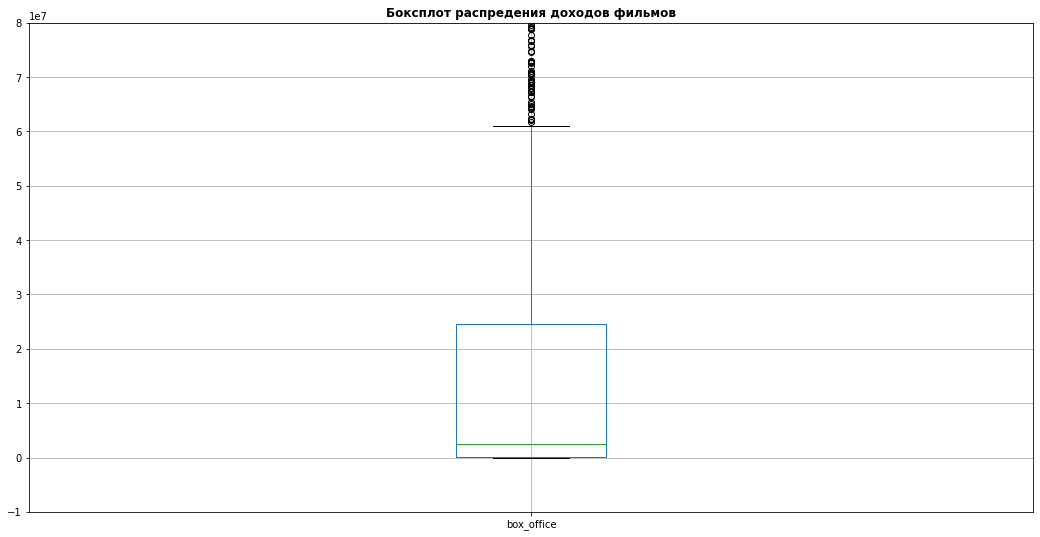

In [96]:
model_df.boxplot('box_office')
plt.ylim(-(10**7), 80000000)
plt.title('Боксплот распредения доходов фильмов', weight='bold')
plt.show()

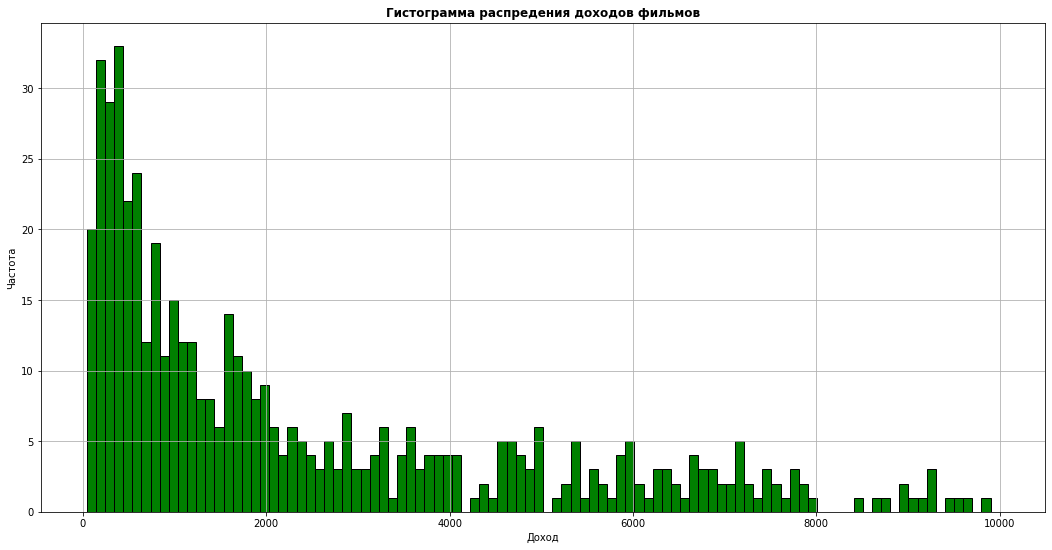

In [97]:
model_df['box_office'].plot(kind='hist', bins=100, edgecolor='black', color='green', grid=True, range=(40, 10000))
plt.title('Гистограмма распредения доходов фильмов', weight='bold')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

In [98]:
model_df.pivot_table(index=['title', 'production_country', 'show_start_date'], values='box_office').sort_values(by='box_office').head(20)

,,,box_office
title,production_country,show_start_date,
Жестокий романс,СССР,2013-10-18 12:00:00+00:00,40.00
Каменный цветок,СССР,2014-12-01 12:00:00+00:00,50.00
22 пули: Бессмертный,Франция,2010-04-01 12:00:00+00:00,75.00
Астерикс и Обеликс в Британии 3D,Франция-Италия-Испания-Венгрия,2012-10-05 12:00:00+00:00,80.00
Одиноким предоставляется общежитие,СССР,2014-12-01 12:00:00+00:00,100.00
Обещание /По произведению Стефана Цвейга/,Франция - Бельгия,2014-05-19 12:00:00+00:00,100.00
Волшебное приключение,Великобритания - Франция,2015-01-18 12:00:00+00:00,100.00
За спичками,"СССР, Финляндия",2013-10-18 12:00:00+00:00,100.00
Лучшие дни впереди,Франция,2013-09-03 12:00:00+00:00,100.00


In [99]:
model_df.query('0 < box_office < 2501')['title'].count()

340

340 строк где размер сборов от 40 до 2500 руб. Судя по дате старта показа, данные по сборам актуальные. Это может быть как ошибка ввода, так и реальные результаты, если фильмы показвали в небольших населенных пунктах.
Так как строк где указан кассовый сбор всего 3134 (почти половина от всех данных), то удалять какие-либо строки из выборки нецелесообразно.

#### Добавление новых признаков

In [100]:
model_df['show_start_year'] = model_df['show_start_date'].dt.year

In [101]:
def first_data_strip(df, column, new_column):
    df[new_column] = df[column].str.split(',').str[0]

In [102]:
first_data_strip(model_df, 'director', 'main_director')
first_data_strip(model_df, 'genres', 'main_genre')

In [103]:
model_df['main_genre'].value_counts()

драма              1688
неизвестно          875
комедия             696
боевик              617
ужасы               573
мультфильм          537
триллер             521
фантастика          410
мелодрама           382
фэнтези             358
документальный      219
аниме                74
мюзикл               64
детектив             56
приключения          55
военный              46
криминал             39
биография            33
семейный             32
детский              28
история              26
короткометражка      13
концерт              12
спорт                 9
музыка                7
вестерн               7
для взрослых          3
фильм-нуар            1
реальное ТВ           1
Name: main_genre, dtype: int64

- Какая доля от общего бюджета фильма составляет государственная поддержка.

In [104]:
model_df['gos_fund_rate'] = (model_df['nonrefundable_support'] + model_df['refundable_support']) / model_df['budget']
model_df[model_df['gos_fund_rate'].notna()].head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing,show_start_year,main_director,main_genre,gos_fund_rate
1259,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,False,False,False,False,False,False,False,False,False,False,False,0,2013,А.Атанесян,драма,0.33
1422,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,неизвестно,28140.00,False,False,False,False,False,False,False,False,True,True,False,2,2014,А.Якимчук,неизвестно,0.70
1471,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,False,False,False,False,False,False,False,False,False,False,False,0,2013,Р.Давлетьяров,комедия,0.61
1497,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,False,False,False,False,False,False,False,False,False,False,False,0,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1758,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,False,False,False,False,False,False,False,False,False,False,False,0,2014,М.Угаров,драма,0.62
1819,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,25000000.00,51850000.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,False,False,False,False,False,False,False,False,False,False,False,0,2015,С.Серегин,мультфильм,0.48
1834,А зори здесь тихие,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,неизвестно,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,False,False,False,True,False,False,False,False,False,False,False,1,2015,Р.Давлетьяров,драма,0.68
1835,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,46502299.00,86210067.00,"Министерство культуры, Фонд кино",6.70,драма,4731239.50,False,False,False,False,False,False,False,False,False,False,False,0,2014,В.Глаголева,драма,0.54
1867,Призрак_,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,False,False,False,False,False,False,False,False,False,False,False,0,2015,А.Войтинский,триллер,0.54
1876,Ведьма,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,34000000.00,48571430.00,Министерство культуры,7.40,

In [105]:
data_vol_check()

Коли-во строк в источнике: 7485
Коли-во строк после фильтрации: 7382
Доля строк после фильтрации: 98.62%


После заполнения пропусков и удаления строк мы имеем 7382 строки или 98.62% от первоначального датасета.
Выбросы в признаках содержат значительное кол-во фильмов с гос. финансирование. В связи с этим, я решил не удалять такие строки, так как они необходимы для решения задачи.

### Исследовательский анализ данных


- Сколько фильмов выходило в прокат каждый год.

In [106]:
movie_count = model_df.pivot_table(index='show_start_year', values='title', aggfunc='count')
movie_count = movie_count.rename(columns={'title': 'Кол-во фильмов в год'})
movie_count

,Кол-во фильмов в год
show_start_year,
2010,967
2011,615
2012,583
2013,614
2014,792
2015,692
2016,812
2017,503
2018,878


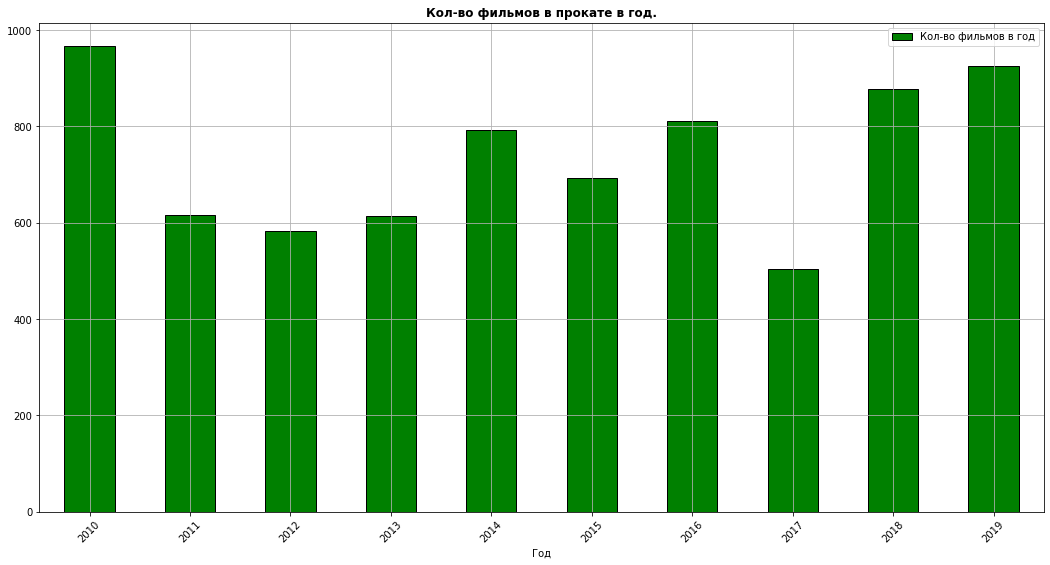

In [107]:
movie_count.plot.bar(rot=45, grid=True, edgecolor='black', color='green')
plt.xlabel('Год')
plt.title('Кол-во фильмов в прокате в год.', weight='bold')
plt.show()

Считаем какая доля фильмов в базе имеет данные о прокате.

In [108]:
model_df['box_office_rate'] = model_df['box_office'].apply(lambda x: 0 if np.isnan(x) else 1)
model_df['box_office_rate'].value_counts()

0    4248
1    3134
Name: box_office_rate, dtype: int64

In [109]:
model_df['box_office_rate'].mean().round(2)

0.42

In [110]:
box_office_rate = model_df.pivot_table(index='show_start_year', values='box_office_rate')
box_office_rate

,box_office_rate
show_start_year,
2010,0.10
2011,0.18
2012,0.21
2013,0.29
2014,0.34
2015,0.67
2016,0.65
2017,0.71
2018,0.54


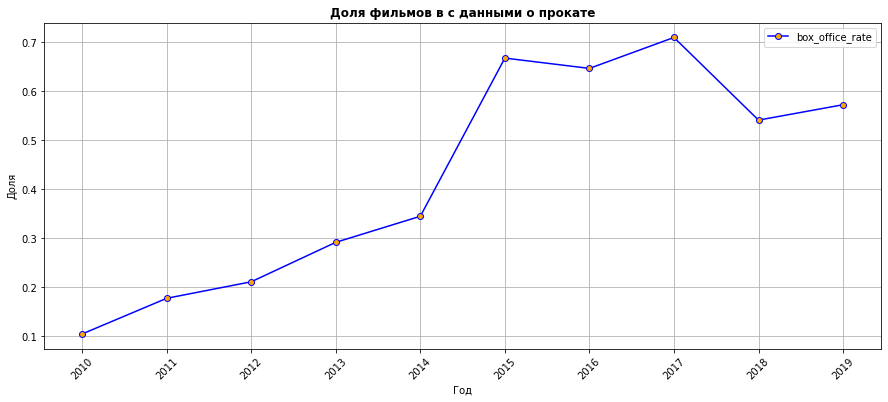

In [111]:
box_office_rate.plot(style='o-', rot=45, figsize=(15, 6), grid=True, xticks=box_office_rate.index, color='blue',
                       markerfacecolor='orange')
plt.xlabel('Год')
plt.ylabel('Доля')
plt.title('Доля фильмов в с данными о прокате', weight='bold')
plt.show()

**Вывод:**
- С 2010 года видна положительная тенденция на заполняемость данными по прокату.
- Больше всего данных по прокату собрано с 2015 по 2017 года.

- Динамика проката по годам.

In [112]:
box_office_rev = (
    model_df.groupby('show_start_year')
    .agg(movie_count=('title', 'count'), box_office_sum=('box_office', 'sum'))
)
box_office_rev

,movie_count,box_office_sum
show_start_year,,
2010,967,2428654.00
2011,615,14102765.00
2012,583,6955423.00
2013,614,29799706.20
2014,792,7444951859.20
2015,692,39497365196.40
2016,812,47866299741.91
2017,503,48563707217.51
2018,878,49668403134.32


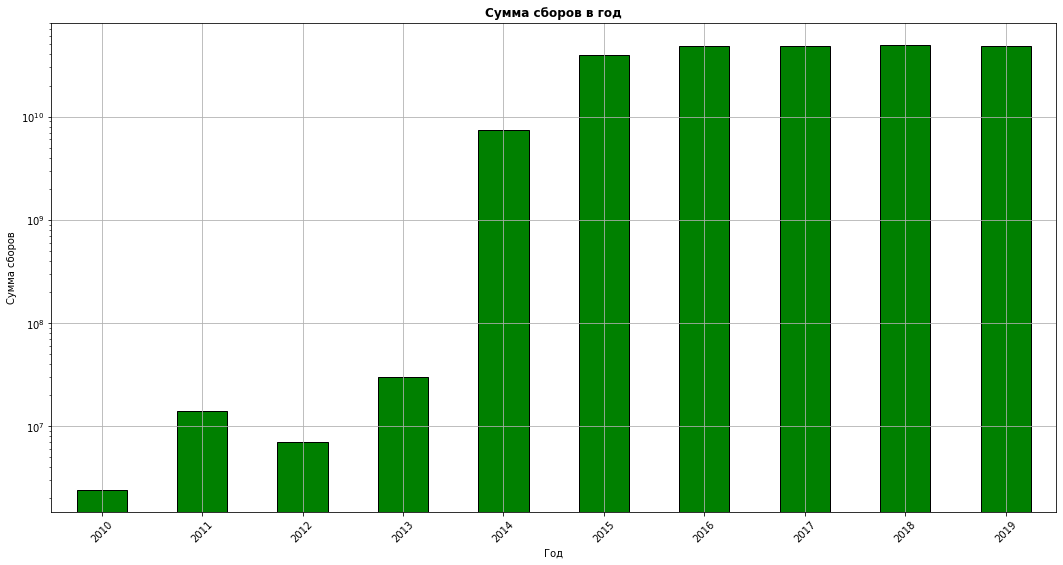

In [113]:
box_office_rev['box_office_sum'].plot(kind='bar', rot=45, grid=True, logy=True, edgecolor='black',
                                      color='green')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.title('Сумма сборов в год', weight='bold')
plt.show()

**Вывод:**
- Минимальный сумма сборов была в 2010 году (2484 тыс.)
- Максимальная сумма сборов была в 2019 году (48425 млн.)

**Комментарий:**
На мой взгляд данные по сборам до 2015 года можно не рассматривать, так как доля фильмов где указаны эти данные менее 50%.

- Средняя и медианная сумма сборов для каждого года.

In [114]:
mean_median_box_office = model_df.pivot_table(index='show_start_year', values='box_office', aggfunc=('mean', 'median'))
mean_median_box_office

,mean,median
show_start_year,,
2010,24046.08,1710.00
2011,129383.17,3000.00
2012,56548.15,6220.00
2013,166478.81,3580.00
2014,27270885.93,20400.00
2015,85492132.46,5003450.15
2016,91173904.27,3915041.02
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


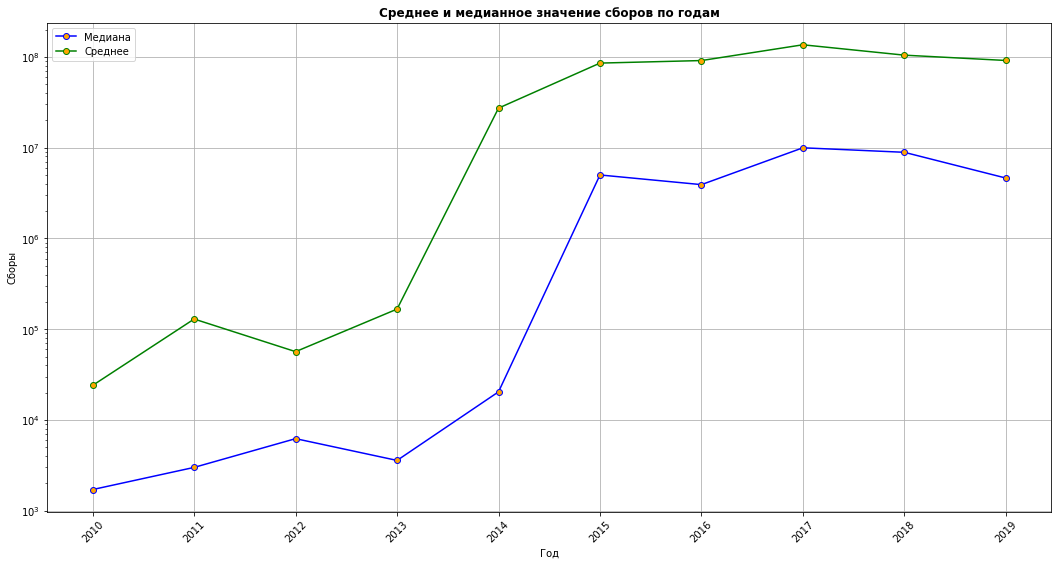

In [115]:
fig, ax = plt.subplots()

mean_median_box_office['median'].plot(style='o-', rot=45, grid=True, xticks=mean_median_box_office.index, color='blue',
                       markerfacecolor='orange', logy=True, label='Медиана', ax=ax)

mean_median_box_office['mean'].plot(style='o-', rot=45, grid=True, xticks=mean_median_box_office.index, color='green',
                       markerfacecolor='orange', logy=True, label='Среднее', ax=ax)

ax.set_xlabel('Год')
ax.set_ylabel('Сборы')
ax.set_title('Среднее и медианное значение сборов по годам', weight='bold')
ax.legend()

plt.show()

- Влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

In [116]:
main_df['age_restriction'].unique()
mapping = {
    '«18+» - запрещено для детей': '18+',
    '«16+» - для детей старше 16 лет': '16+',
    '«12+» - для детей старше 12 лет': '12+',
    '«6+» - для детей старше 6 лет': '6+',
    '«0+» - для любой зрительской аудитории': '0+',
    
    }

model_df['age_restriction_clean'] = model_df['age_restriction'].map(mapping).fillna('неизвестно')

In [117]:
age_box_office = model_df.query('show_start_year > 2014').pivot_table(index='show_start_year', columns='age_restriction_clean'
                                                                       , values='box_office')
age_box_office

age_restriction_clean,0+,12+,16+,18+,6+
show_start_year,,,,,
2015,9975120.48,189112250.12,68072580.06,41153851.27,164184893.80
2016,3664118.26,148834713.71,92069328.96,44992912.71,172187800.12
2017,76532976.67,191498235.63,154917709.92,65656432.52,268580936.57
2018,6489800.42,212944651.65,105792322.74,48939025.15,148602567.99
2019,5915355.61,149178809.10,71648421.26,55310362.31,158673440.13


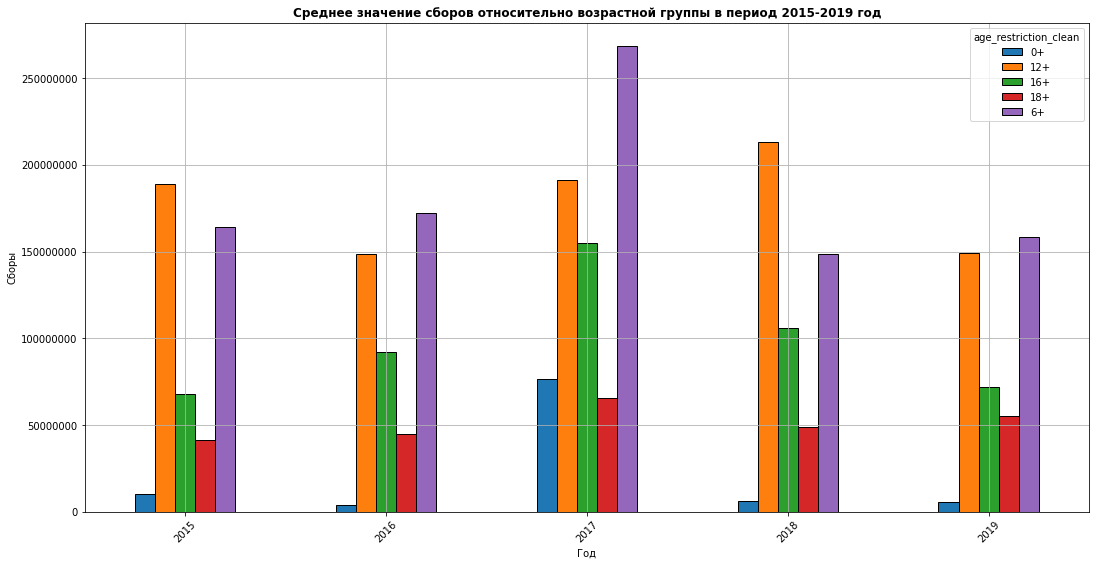

In [118]:
age_box_office.plot(kind='bar', grid=True, edgecolor='black', rot=45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.title('Среднее значение сборов относительно возрастной группы в период 2015-2019 год', weight='bold')
plt.show()

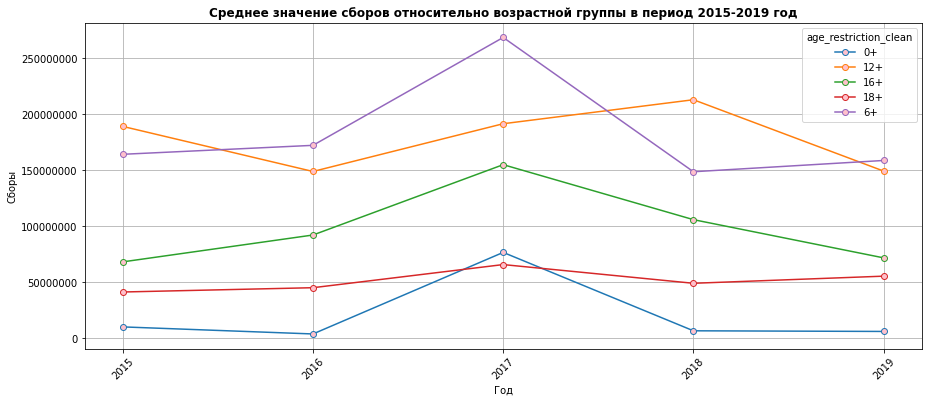

In [119]:
age_box_office.plot(style='o-', rot=45, figsize=(15, 6), grid=True, xticks=age_box_office.index,
                       markerfacecolor='pink')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Среднее значение сборов относительно возрастной группы в период 2015-2019 год', weight='bold')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show()

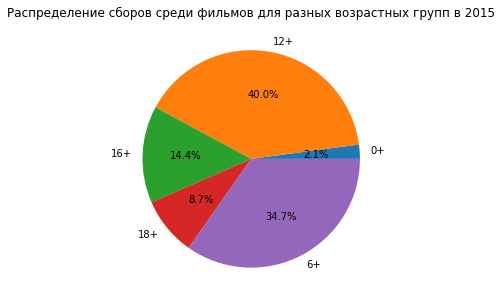

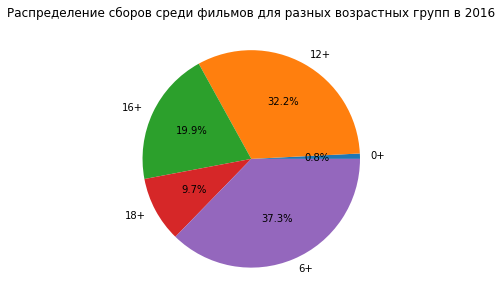

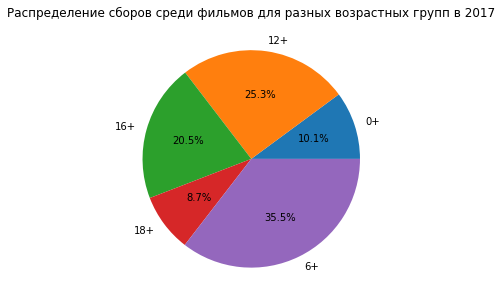

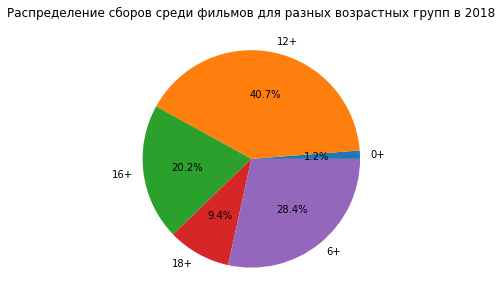

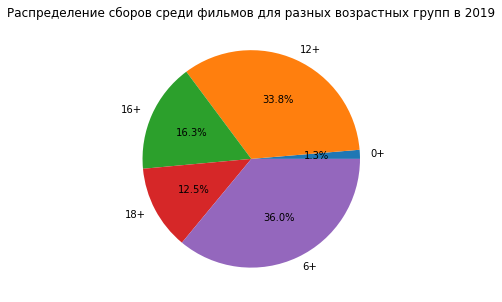

In [120]:
for year in age_box_office.index:
    box_office_values = age_box_office.loc[year]
    plt.figure(figsize=(5, 5))
    plt.pie(box_office_values, labels=box_office_values.index, autopct='%1.1f%%')
    plt.title(f'Распределение сборов среди фильмов для разных возрастных групп в {year}')
    plt.show()

In [121]:
(
    model_df.query('age_restriction_clean == "0+" and show_start_year == 2017')
    .pivot_table(index=['title', 'age_restriction_clean'], values='box_office')
    .sort_values(by='box_office', ascending=False)
    .head(10)
)

,,box_office
title,age_restriction_clean,
Урфин Джюс и его деревянные солдаты,0+,206478186.00
"Колобанга. Привет, Интернет!",0+,22178956.00
Маша и медведь. Новые истории,0+,941788.00


In [122]:
(
    model_df.query('age_restriction_clean == "6+" and show_start_year == 2017')
    .pivot_table(index=['title', 'age_restriction_clean'], values='box_office')
    .sort_values(by='box_office', ascending=False)
    .head(10)
)

,,box_office
title,age_restriction_clean,
Движение вверх,6+,2779686144.00
Гадкий я 3,6+,1390392637.00
Босс-Молокосос,6+,1376726723.00
Зверопой,6+,886614109.00
Ёлки Новые,6+,855451052.00
Три богатыря и принцесса Египта,6+,759226773.00
Фердинанд,6+,576773365.00
Тачки 3 Лу,6+,558049518.00
Время первых (2017),6+,544332260.00


In [123]:
(
    model_df.query('age_restriction_clean == "16+" and show_start_year == 2017')
    .pivot_table(index=['title', 'age_restriction_clean'], values='box_office')
    .sort_values(by='box_office', ascending=False)
    .head(10)
)

,,box_office
title,age_restriction_clean,
Пираты Карибского моря: Мертвецы не рассказывают сказки,16+,2118396119.00
Стражи Галактики. Часть 2,16+,1468779681.00
Джуманджи: Зов джунглей,16+,1246587858.00
Тор: Рагнарёк,16+,1229588275.00
Мумия (2017),16+,871151453.00
Человек-паук: Возвращение домой,16+,867511365.00
"Убийство в ""Восточном экспрессе""",16+,866359507.00
Звёздные войны: Последние джедаи,16+,862471426.00
Красавица и Чудовище (2017),16+,732287208.00


**Вывод:**
- Графики показывают, что возрастные ограничения влияют на сборы фильмов. 
- Наибольшие средние сборы получают фильмы с возрастными ограничениями 6+ и 12+. 
- В 2017 году сборы резко возросли для возрастной категорий 0+, 6+ и 16+, что связано с выходом кассовых фильмов, например таких как **Движение вверх, Гадкий я 3, Урфин Джюс и его деревянные солдаты, Пираты Карибского моря и Стражи Галактики. Часть 2**.

### Исследование фильмов, которые получили государственную поддержку

In [124]:
gov_movie = model_df.query('refundable_support.notna() and nonrefundable_support.notna() and box_office.notna() and show_start_year > 2014')
gov_movie_all = model_df.query('refundable_support.notna() and nonrefundable_support.notna() and box_office.notna()')
gov_movie.head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_studio_ismissing,production_country_ismissing,director_ismissing,producer_ismissing,refundable_support_ismissing,nonrefundable_support_ismissing,budget_ismissing,financing_source_ismissing,ratings_ismissing,genres_ismissing,box_office_ismissing,num_missing,show_start_year,main_director,main_genre,gos_fund_rate,box_office_rate,age_restriction_clean
1819,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,25000000.00,51850000.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,False,False,False,False,False,False,False,False,False,False,False,0,2015,С.Серегин,мультфильм,0.48,1,6+
1834,А зори здесь тихие,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,неизвестно,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,False,False,False,True,False,False,False,False,False,False,False,1,2015,Р.Давлетьяров,драма,0.68,1,12+
1867,Призрак_,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,False,False,False,False,False,False,False,False,False,False,False,0,2015,А.Войтинский,триллер,0.54,1,6+
1876,Ведьма,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,34000000.00,48571430.00,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,False,False,False,False,False,False,False,False,False,False,False,0,2015,Д.Федоров,фэнтези,0.70,1,16+
2020,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,75000000.00,Фонд кино,6.60,драма,446163511.00,False,False,False,False,False,False,False,False,False,False,False,0,2015,Р.Прыгунов,драма,1.00,1,16+


In [125]:
gov_movie.shape[0], gov_movie_all.shape[0], gov_movie.shape[0]/gov_movie_all.shape[0]

(300, 318, 0.9433962264150944)

Далее буду использовать данные из gov_movie, так как фильтрацией по году теряю только 6% данных.

In [126]:
gov_movie['gov_fund'] = gov_movie['refundable_support'] + gov_movie['nonrefundable_support']
gov_movie['profit_loss'] = gov_movie['box_office'] - gov_movie['budget']
gov_movie['ROS'] = round((gov_movie['profit_loss'] / gov_movie['box_office']) * 100, 2)
gov_movie['ROI'] = round((gov_movie['profit_loss'] / gov_movie['budget']) * 100, 2)
gov_movie['refund_rate'] = round((gov_movie['refundable_support'] / gov_movie['gov_fund']) * 100, 2)
gov_movie['nonrefund_rate'] = round((gov_movie['nonrefundable_support'] / gov_movie['gov_fund']) * 100, 2)

In [127]:
movie_count_genre = (gov_movie.pivot_table(index='main_genre', values='title', aggfunc='count')
                     .sort_values(by='title', ascending=False)
                    )
movie_count_genre

,title
main_genre,
драма,79
комедия,70
мультфильм,29
триллер,15
неизвестно,14
мелодрама,12
фэнтези,11
ужасы,10
военный,9


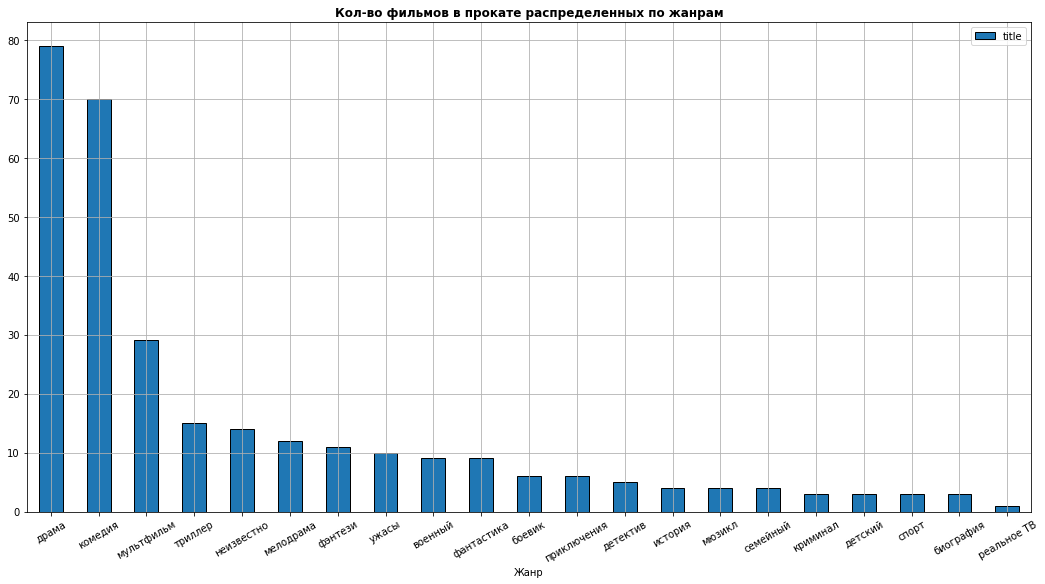

In [128]:
movie_count_genre.plot(kind='bar', grid=True, edgecolor='black', rot=30)
plt.title('Кол-во фильмов в прокате распределенных по жанрам', weight='bold')
plt.xlabel('Жанр')
plt.show()

In [129]:
refund__nonrefund_rate_genre = (gov_movie.pivot_table(index='main_genre', values=('refund_rate', 'nonrefund_rate'), 
                                                      aggfunc='median')
                               .sort_values(by='refund_rate', ascending=False)
                               )
refund__nonrefund_rate_genre

,nonrefund_rate,refund_rate
main_genre,,
мюзикл,41.97,58.03
реальное ТВ,47.17,52.83
мультфильм,66.67,33.33
криминал,83.33,16.67
ужасы,83.75,16.25
история,90.00,10.00
неизвестно,100.00,0.00
фантастика,100.00,0.00
триллер,100.00,0.00


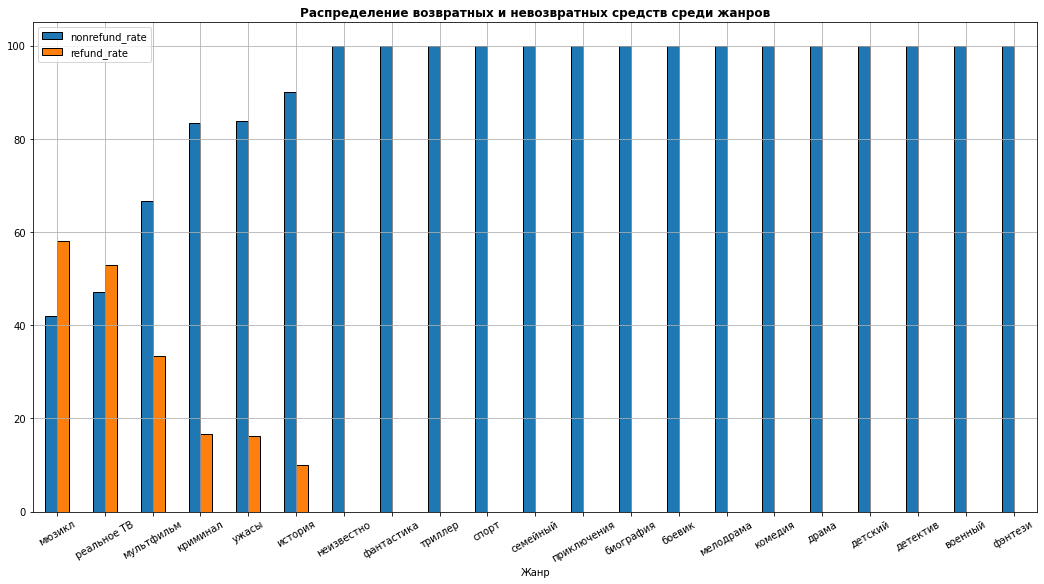

In [130]:
refund__nonrefund_rate_genre.plot(kind='bar', grid=True, edgecolor='black', rot=30)
plt.title('Распределение возвратных и невозвратных средств среди жанров', weight='bold')
plt.xlabel('Жанр')
plt.show()

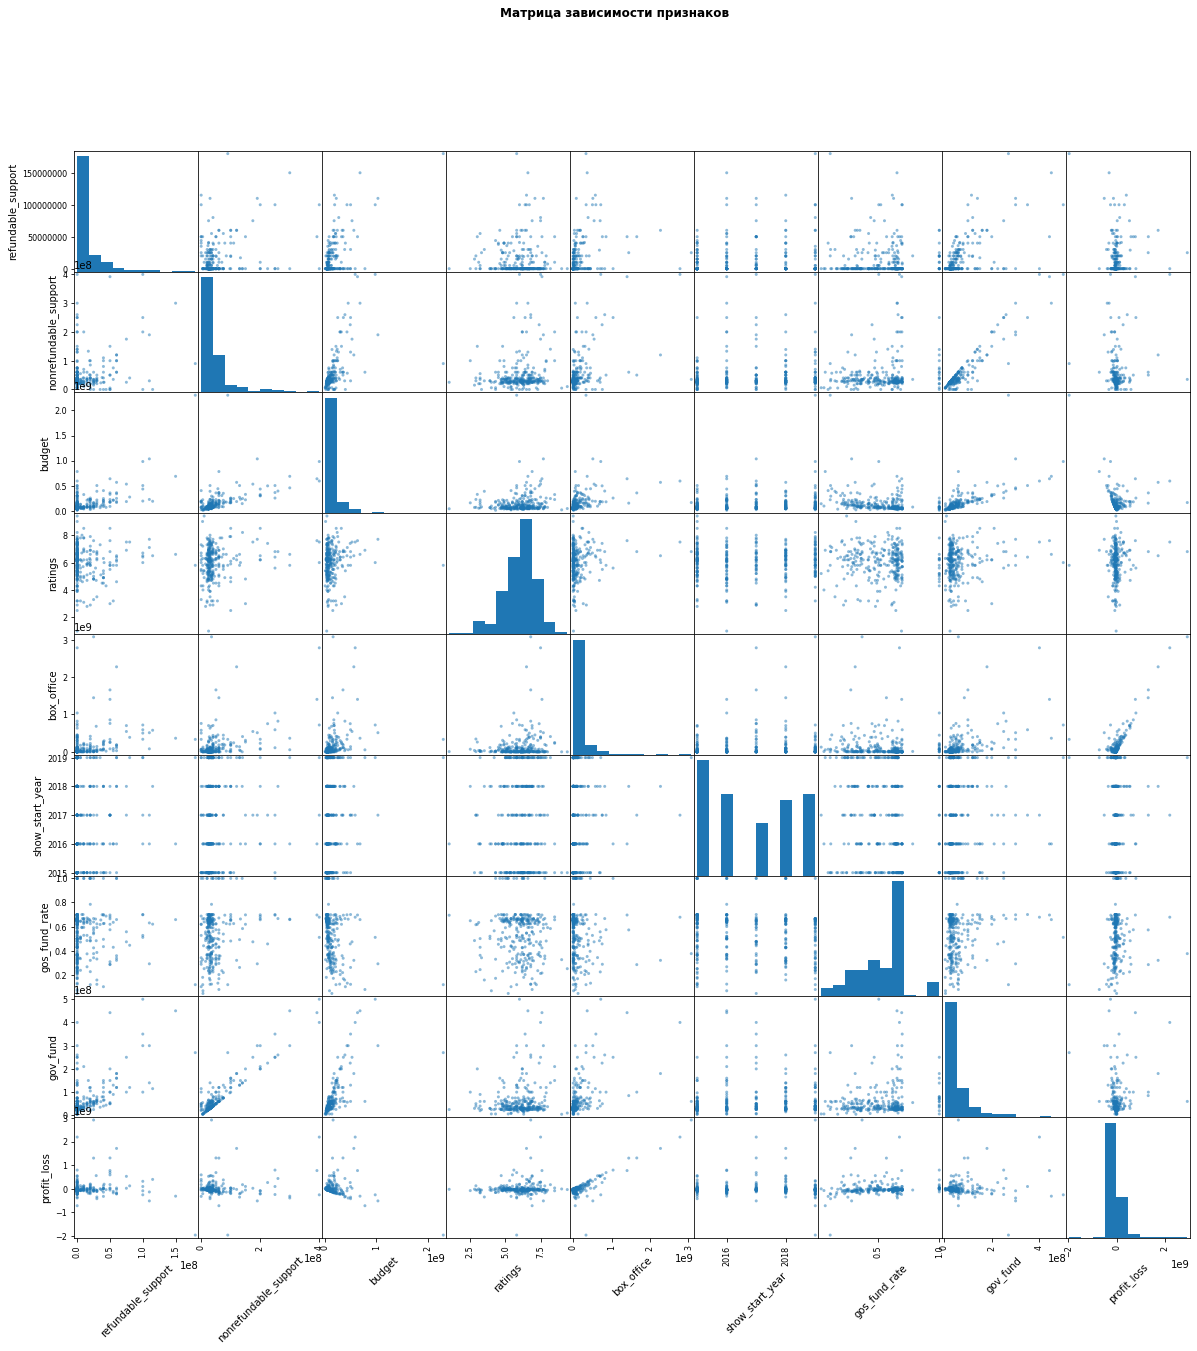

In [131]:
numeric_col = gov_movie[['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office', 
               'show_start_year', 'gos_fund_rate', 'gov_fund', 'profit_loss']]
scatter_matrix  = pd.plotting.scatter_matrix(numeric_col, figsize=(20, 20))
plt.suptitle('Матрица зависимости признаков', weight='bold')
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
plt.show()

In [132]:
numeric_col.loc[3:].corr()

,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,gos_fund_rate,gov_fund,profit_loss
refundable_support,1.00,0.32,0.64,0.01,0.31,0.06,0.01,0.62,-0.05
nonrefundable_support,0.32,1.00,0.59,0.15,0.46,0.10,0.14,0.94,0.14
budget,0.64,0.59,1.00,0.10,0.37,0.16,-0.30,0.71,-0.19
ratings,0.01,0.15,0.10,1.00,0.15,0.05,-0.07,0.13,0.10
box_office,0.31,0.46,0.37,0.15,1.00,0.11,-0.08,0.49,0.84
show_start_year,0.06,0.10,0.16,0.05,0.11,1.00,-0.11,0.11,0.02
gos_fund_rate,0.01,0.14,-0.30,-0.07,-0.08,-0.11,1.00,0.12,0.09
gov_fund,0.62,0.94,0.71,0.13,0.49,0.11,0.12,1.00,0.10
profit_loss,-0.05,0.14,-0.19,0.10,0.84,0.02,0.09,0.10,1.00


**Ключевые выводы по всем фильмам с гос.участием:**
- Зависимость между сборами и долей государственного участия в бюджете фильма не прослеживается (`-0.08`).
- Зависимость между бюджетом фильма и его рейтингом не прослеживается (`0.1`).
- Существует положительная корреляция между возвратными средствами и сборами (`0.31`), а также между невозвратными средствами и сборами (`0.46`).
- Существует положительная корреляция между бюджетом фильма и сборами (`0.37`).

In [133]:
top_genre_box = (gov_movie.pivot_table(index='main_genre', values=('box_office', 'budget', 'profit_loss'), aggfunc='sum')
                 .sort_values(by='box_office', ascending=False).head(10))
top_genre_box['ROS'] = round((top_genre_box['profit_loss'] / top_genre_box['box_office']) * 100, 2)
top_genre_box['ROI'] = round((top_genre_box['profit_loss'] / top_genre_box['budget']) * 100, 2)
top_genre_box

,box_office,budget,profit_loss,ROS,ROI
main_genre,,,,,
комедия,12060398000.33,5672104137.00,6388293863.33,52.97,112.63
драма,9393990547.84,10190155707.00,-796165159.16,-8.48,-7.81
мультфильм,5308524288.16,5544303816.00,-235779527.84,-4.44,-4.25
спорт,2967768387.44,710468965.00,2257299422.44,76.06,317.72
фантастика,1674669432.29,1428224643.00,246444789.29,14.72,17.26
неизвестно,1481720584.64,997054012.00,484666572.64,32.71,48.61
история,1455468234.57,2145062206.00,-689593971.43,-47.38,-32.15
приключения,1205596976.62,3316866189.00,-2111269212.38,-175.12,-63.65
военный,1017670471.80,1285906825.00,-268236353.20,-26.36,-20.86


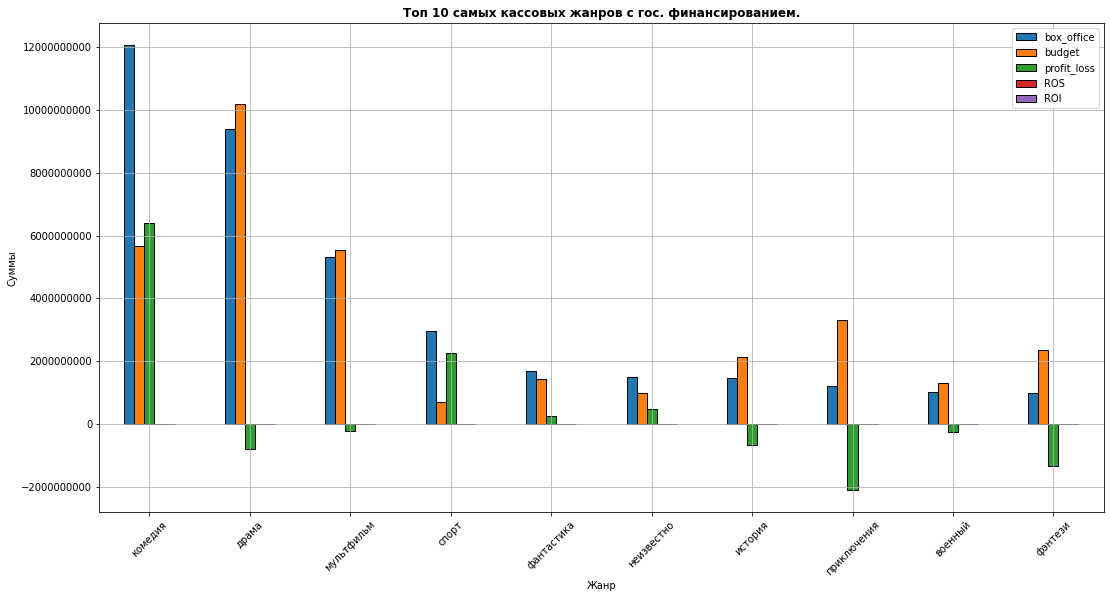

In [134]:
top_genre_box.plot(kind='bar', rot=45, grid=True, edgecolor='black')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Топ 10 самых кассовых жанров с гос. финансированием.', weight='bold')
plt.xlabel('Жанр')
plt.ylabel('Суммы')
plt.show()

- Самый кассовый жанр среди фильмов с гос.финансированием это комедия, далее идет драма;
- Cамый прибыльный жанр - комедия;
- Самый убыточный жанр - приключения.

In [135]:
median_genre_profit_loss = (gov_movie.pivot_table(index='main_genre', values='profit_loss', aggfunc=('mean', 'median'))
                            .sort_values(by='mean', ascending=False).head(10)
                           )
median_genre_profit_loss

,mean,median
main_genre,,
спорт,752433140.81,78412085.10
комедия,91261340.90,-26324527.32
неизвестно,34619040.90,-46068116.50
фантастика,27382754.37,-54087070.50
ужасы,14624556.43,-12420194.32
семейный,-681370.29,-18327833.42
биография,-4016866.45,-36890374.00
мультфильм,-8130328.55,-44989365.00
драма,-10078039.99,-40037262.00


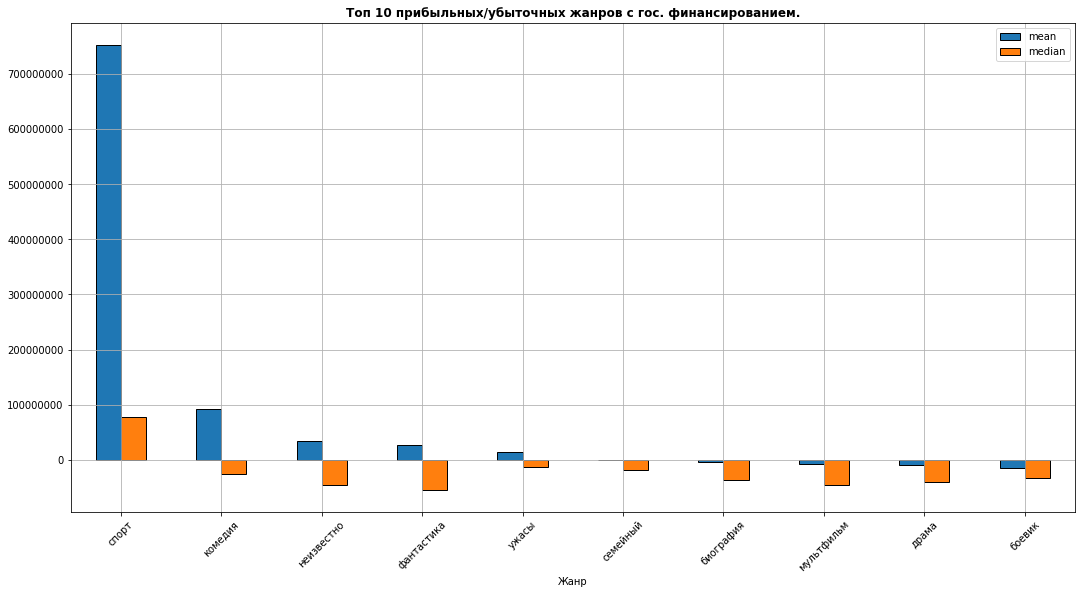

In [136]:
median_genre_profit_loss.plot(kind='bar', rot=45, grid=True, edgecolor='black')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Топ 10 прибыльных/убыточных жанров с гос. финансированием.', weight='bold')
plt.xlabel('Жанр')
plt.show()

- Сымый прибыльный жанр комедия, однако в среднем (медиана) жанр убыточен. Прибыль по жанру могла появится из-за одного, двух успешных в финансовом плане фильмов.
- В среднем (медиана) все жанры убыточны, кроме спорта.

In [137]:
top_pop_movie = (gov_movie.pivot_table(index=('title', 'main_genre'), 
                                       values=('ratings', 'box_office', 'budget', 'profit_loss', 'gos_fund_rate'))
             .sort_values(by='profit_loss', ascending=False)).head(10)
top_pop_movie['ROS'] = round((top_pop_movie['profit_loss'] / top_pop_movie['box_office']) * 100, 2)
top_pop_movie['ROI'] = round((top_pop_movie['profit_loss'] / top_pop_movie['budget']) * 100, 2)
top_pop_movie

,,box_office,budget,gos_fund_rate,profit_loss,ratings,ROS,ROI
title,main_genre,,,,,,,
Холоп,комедия,3073568690.79,160000000.00,0.38,2913568690.79,6.80,94.79,1820.98
Движение вверх,спорт,2779686144.00,590192191.00,0.68,2189493953.00,7.50,78.77,370.98
Т-34,драма,2271754004.52,563784717.00,0.32,1707969287.52,6.50,75.18,302.95
Последний богатырь,комедия,1655037688.00,352477575.00,0.28,1302560113.00,6.80,78.70,369.54
Лёд,неизвестно,1445731797.89,148585222.00,0.57,1297146575.89,NaN,89.72,873.00
Притяжение (2016),фантастика,1038321489.00,250000000.00,1.00,788321489.00,5.60,75.92,315.33
Экипаж,драма,1402255390.00,635283867.00,0.70,766971523.00,7.60,54.70,120.73
Ёлки Новые,комедия,855451052.00,174381922.00,0.57,681069130.00,5.80,79.62,390.56
Три богатыря и принцесса Египта,мультфильм,759226773.00,174464395.00,0.29,584762378.00,5.50,77.02,335.18


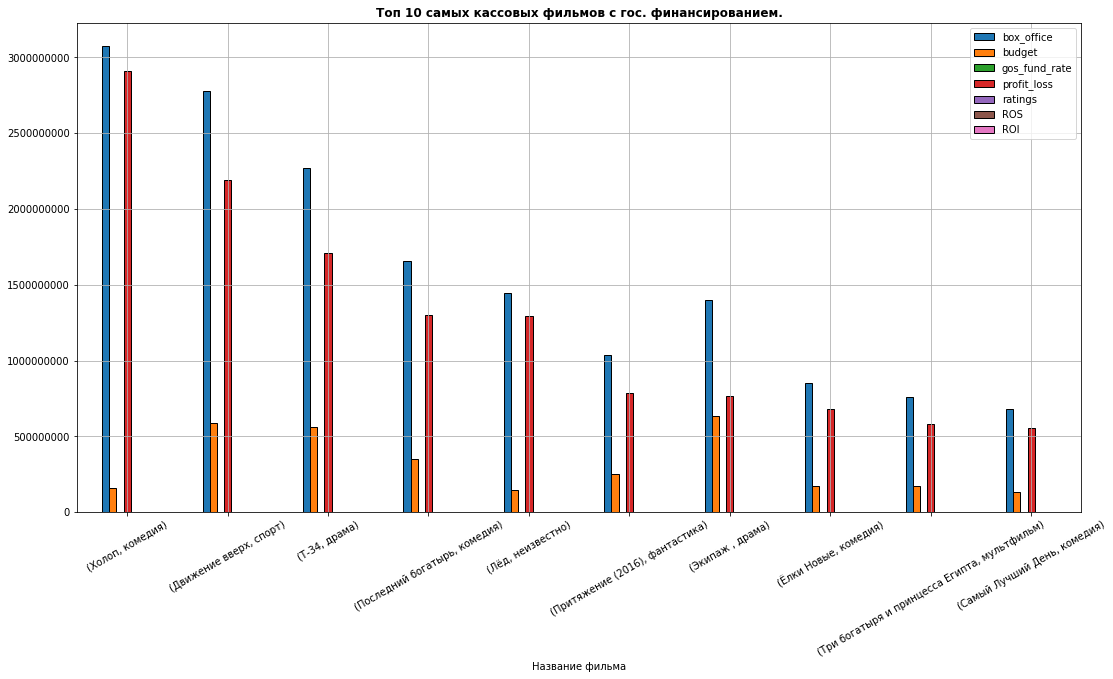

In [138]:
top_pop_movie.plot(kind='bar', grid=True, edgecolor='black', rot=30)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Топ 10 самых кассовых фильмов с гос. финансированием.', weight='bold')
plt.xlabel('Название фильма')
plt.show()

In [139]:
top_pop_movie.corr()

,box_office,budget,gos_fund_rate,profit_loss,ratings,ROS,ROI
box_office,1.00,0.42,-0.17,0.97,0.71,0.31,0.55
budget,0.42,1.00,0.13,0.20,0.78,-0.68,-0.46
gos_fund_rate,-0.17,0.13,1.00,-0.22,0.04,-0.29,-0.24
profit_loss,0.97,0.20,-0.22,1.00,0.57,0.51,0.71
ratings,0.71,0.78,0.04,0.57,1.00,-0.30,0.09
ROS,0.31,-0.68,-0.29,0.51,-0.30,1.00,0.77
ROI,0.55,-0.46,-0.24,0.71,0.09,0.77,1.00


In [140]:
top_pop_movie['ratings'].mean(), top_pop_movie['ratings'].median()

(6.311111111111112, 6.5)

**Ключевые выводы по топ 10 прибыльным фильмам с гос. участием:**
- Самые прибыльные фильмы "Холоп" и "Движение вверх";
- Прослуживается отрицательная корреляция между долей участия государства в финансировании и рентабельности продаж (`-0.29`), а также рентабельности инвестиций (`-0.24`);
- Присутствует положительная корреляция между рейтингом и сборами (`0.71`);
- Присутствует положительная корреляция между рейтингом и бюджетом (`0.78`);
- Средний рейтинг - `6.3`, Медиана - `6.5`.

In [141]:
top_loser_movie = (gov_movie.pivot_table(index=('title', 'main_genre'), 
                                         values=('ratings', 'box_office', 'budget', 'profit_loss', 'gos_fund_rate'))
             .sort_values(by='profit_loss', ascending=False)).tail(10)
top_loser_movie['ROS'] = round((top_loser_movie['profit_loss'] / top_loser_movie['box_office']) * 100, 2)
top_loser_movie['ROI'] = round((top_loser_movie['profit_loss'] / top_loser_movie['budget']) * 100, 2)
top_loser_movie

,,box_office,budget,gos_fund_rate,profit_loss,ratings,ROS,ROI
title,main_genre,,,,,,,
Союз спасения,история,717703185.53,980000000.00,0.51,-262296814.47,6.00,-36.55,-26.76
Дуэлянт,драма,364285139.60,684200536.00,0.66,-319915396.40,6.60,-87.82,-46.76
Крякнутые каникулы,мультфильм,69693747.93,399075326.00,0.10,-329381578.07,5.40,-472.61,-82.54
Гурвинек. Волшебная игра,мультфильм,30325879.15,385000000.00,0.16,-354674120.85,3.50,-1169.54,-92.12
Тобол,история,138162876.53,499826569.00,0.26,-361663692.47,5.80,-261.77,-72.36
Девятая,детектив,55876887.40,453704666.00,0.66,-397827778.60,5.80,-711.97,-87.68
Территория,детектив,72578317.40,500000000.00,0.12,-427421682.60,6.80,-588.91,-85.48
Матильда,фэнтези,511775548.00,1032905957.00,0.29,-521130409.00,7.70,-101.83,-50.45
Грех,драма,54243202.71,779941965.00,0.08,-725698762.29,6.90,-1337.86,-93.05


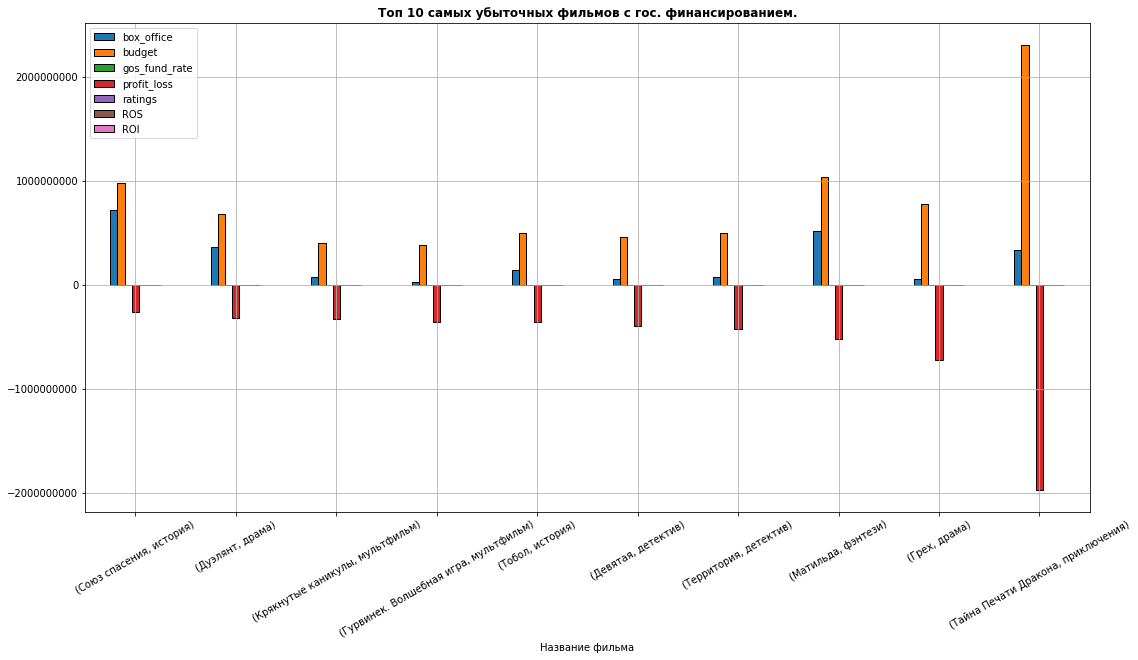

In [142]:
top_loser_movie.plot(kind='bar', grid=True, edgecolor='black', rot=30)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Топ 10 самых убыточных фильмов с гос. финансированием.', weight='bold')
plt.xlabel('Название фильма')
plt.show()

In [143]:
top_loser_movie.corr()

,box_office,budget,gos_fund_rate,profit_loss,ratings,ROS,ROI
box_office,1.00,0.47,0.40,-0.07,0.38,0.72,0.91
budget,0.47,1.00,-0.16,-0.91,0.20,0.13,0.10
gos_fund_rate,0.40,-0.16,1.00,0.37,0.13,0.50,0.57
profit_loss,-0.07,-0.91,0.37,1.00,-0.05,0.19,0.30
ratings,0.38,0.20,0.13,-0.05,1.00,0.39,0.36
ROS,0.72,0.13,0.50,0.19,0.39,1.00,0.83
ROI,0.91,0.10,0.57,0.30,0.36,0.83,1.00


In [144]:
top_loser_movie['ratings'].mean(), top_loser_movie['ratings'].median()

(6.029999999999999, 5.9)

**Ключевые выводы по топ 10 убыточным фильма:**
- Самый убыточный фильм "Тайна Печати Дракона";
- Прослуживается положительная корреляция между долей участия государства в финансировании и рентабельности продаж (`0.5`), а также рентабельности инвестиций (`0.57`). Чем меньше гос-во участвует, тем менне успешен фильм в финансовом плане;
- Средний рейтинг - `6`, Медиана - `5.9`;
- Матильда (жанр фэнтези)?.

In [145]:
top_rating_movie = (gov_movie.pivot_table(index=('title'), 
                                         values=('ratings', 'box_office', 'budget', 'profit_loss', 'gos_fund_rate'))
             .sort_values(by='ratings', ascending=False)).head(10)
top_rating_movie['ROS'] = round((top_rating_movie['profit_loss'] / top_rating_movie['box_office']) * 100, 2)
top_rating_movie['ROI'] = round((top_rating_movie['profit_loss'] / top_rating_movie['budget']) * 100, 2)
top_rating_movie

,box_office,budget,gos_fund_rate,profit_loss,ratings,ROS,ROI
title,,,,,,,
Главный,334750.00,40000000.00,0.25,-39665250.00,9.40,-11849.22,-99.16
Я умею вязать,801370.00,14462464.00,0.32,-13661094.00,9.00,-1704.72,-94.46
БОЛЬШОЙ,228578204.00,320000000.00,0.66,-91421796.00,8.50,-40.00,-28.57
А зори здесь тихие,249166767.70,220588394.00,0.68,28578373.70,8.50,11.47,12.96
Миллиард,408646665.70,240041307.00,0.58,168605358.70,8.20,41.26,70.24
Мотылёк,410058.00,63170000.00,0.59,-62759942.00,8.00,-15305.14,-99.35
Герой,172871342.04,250000000.00,0.48,-77128657.96,7.90,-44.62,-30.85
Однажды,12748398.30,156360666.00,0.62,-143612267.70,7.90,-1126.51,-91.85
Простая история,58720.00,180000000.00,0.36,-179941280.00,7.80,-306439.51,-99.97


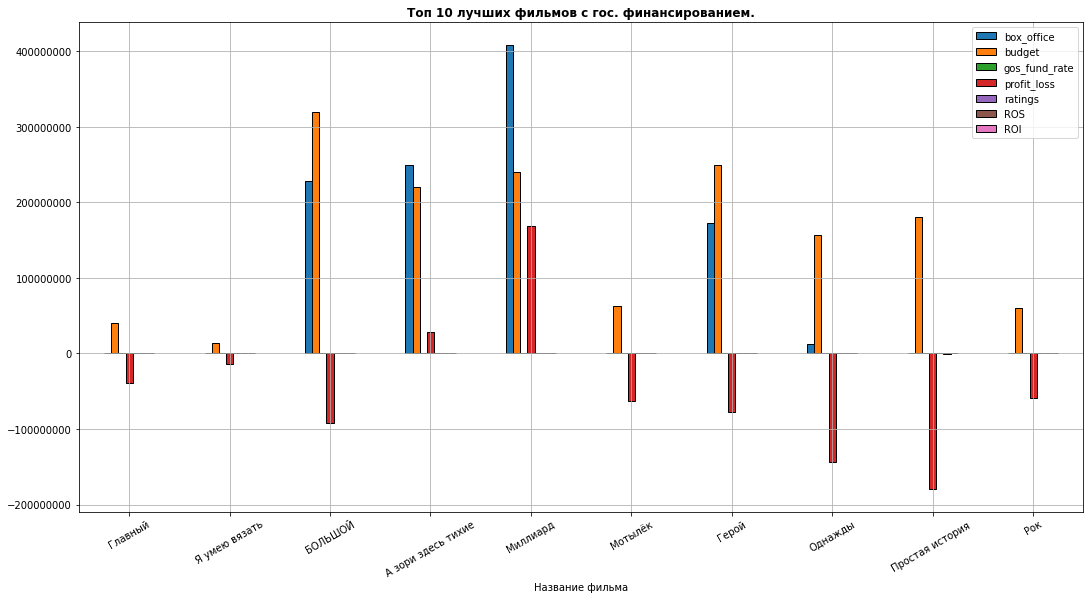

In [146]:
top_rating_movie.plot(kind='bar', grid=True, edgecolor='black', rot=30)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Топ 10 лучших фильмов с гос. финансированием.', weight='bold')
plt.xlabel('Название фильма')
plt.show()

In [147]:
ROI_ROS_genre = (gov_movie.pivot_table(index='main_genre', values=('ROS', 'ROI'), aggfunc='median')
                 .sort_values(by='ROI', ascending=False)).head(10)
ROI_ROS_genre

,ROI,ROS
main_genre,,
спорт,86.86,46.48
ужасы,-29.83,-44.65
приключения,-32.01,-47.08
семейный,-40.02,-1676.67
мультфильм,-40.13,-67.04
комедия,-45.16,-87.33
история,-49.56,-149.16
боевик,-56.39,-143.36
реальное ТВ,-59.10,-144.49


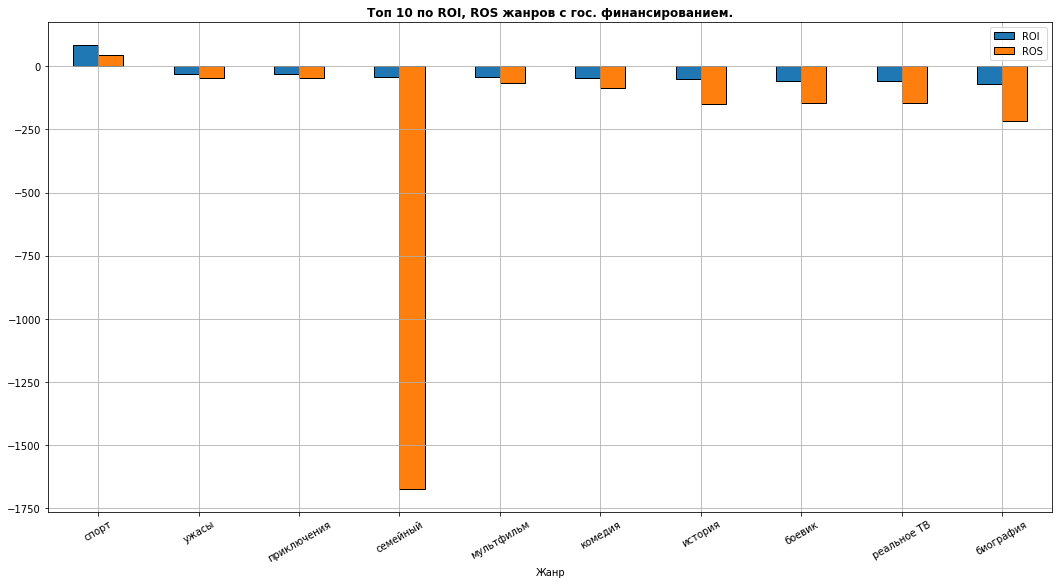

In [148]:
ROI_ROS_genre.plot(kind='bar', grid=True, edgecolor='black', rot=30)
plt.title('Топ 10 по ROI, ROS жанров с гос. финансированием.', weight='bold')
plt.xlabel('Жанр')
plt.show()

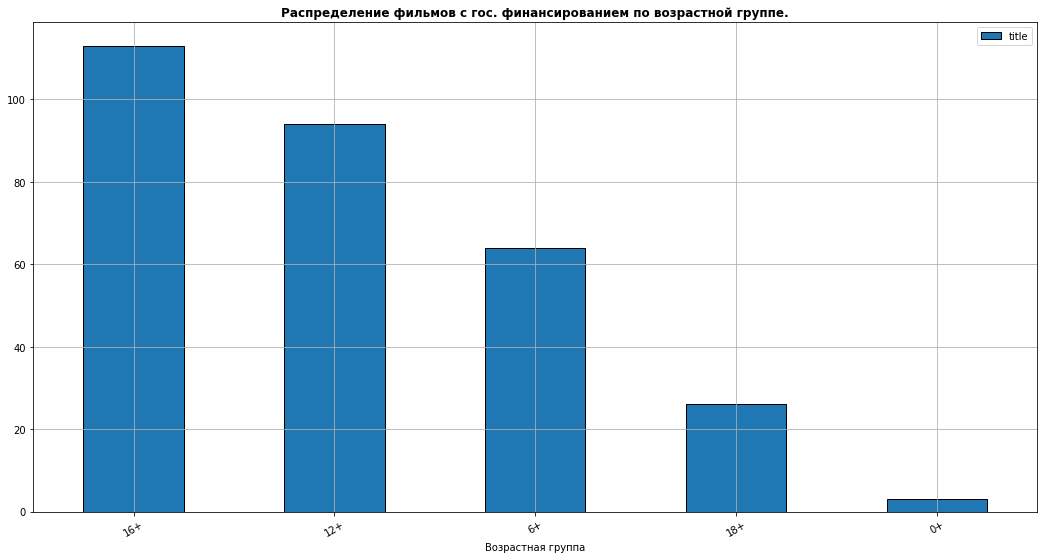

In [149]:
(
    gov_movie.pivot_table(index=('age_restriction_clean'), values='title', aggfunc='count')
    .sort_values(by='title', ascending=False).head(30).plot(kind='bar', grid=True, edgecolor='black', rot=30)
)
plt.title('Распределение фильмов с гос. финансированием по возрастной группе.', weight='bold')
plt.xlabel('Возрастная группа')
plt.show()

### Общий вывод

Больше всего фильмов в период с 2014 по 2019 год снималось в жанре **драма и комедия**.

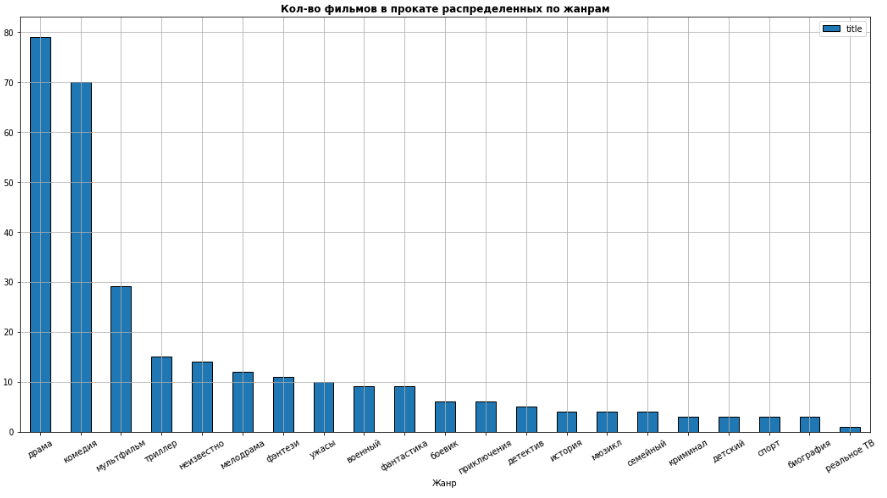
***
Доля возвратных средств присутствует в следующих жанрах: **мюзикл, реальное ТВ, мультфильм, криминал, ужасы, история**

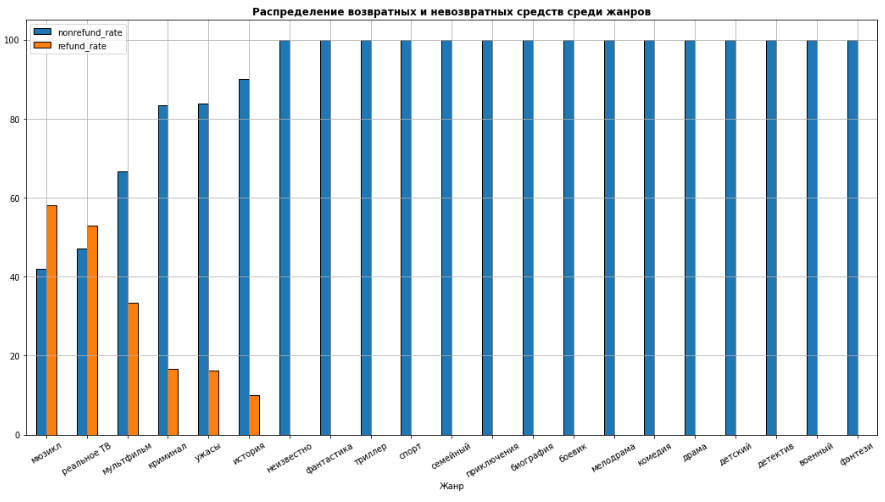
***
Больше всего фильмов снято для возрастной категории 16+

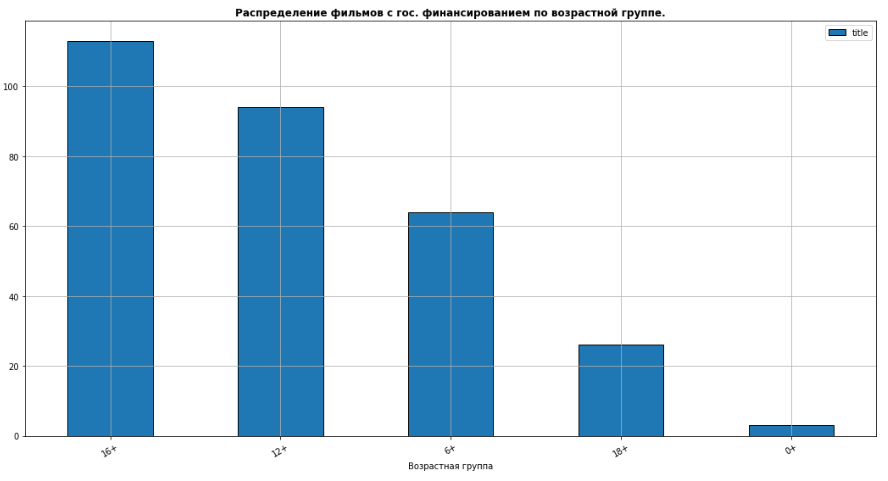
***
**Ключевые выводы по всем фильмам с гос.участием:**
- Зависимость между сборами и долей государственного участия в бюджете фильма <u>не прослеживается</u> (`-0.08`).
- Зависимость между бюджетом фильма и его рейтингом <u>не прослеживается</u> (`0.1`).
- Существует <u>положительная</u> корреляция между возвратными средствами и сборами (`0.31`), а также между невозвратными средствами и сборами (`0.46`).
- Существует <u>положительная</u> корреляция между бюджетом фильма и сборами (`0.37`).

**ТОП 10 жанров**
- Самый кассовый жанр среди фильмов с гос.финансированием это **комедия**, далее идет **драма**;
- Cамый <u>прибыльный</u> жанр - **комедия**. В среднем (медиана) жанр убыточен. Прибыль по жанру могла появится из-за одного, двух успешных в финансовом плане фильмов.;
- Самый <u>убыточный</u> жанр - **приключения**;
- В среднем (медиана) все жанры убыточны, кроме спорта.

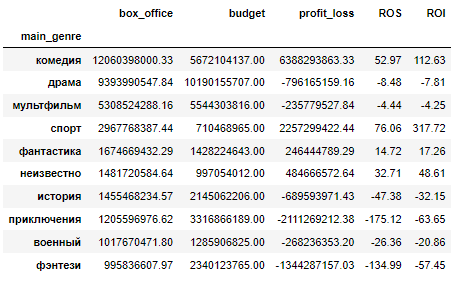 
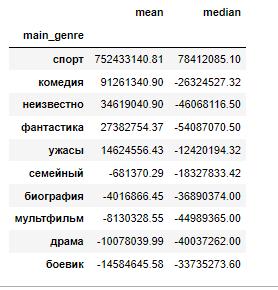
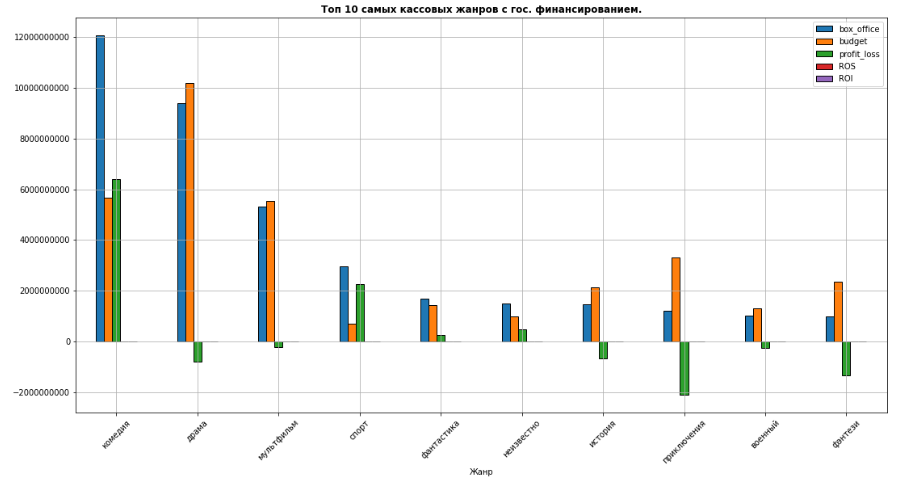

**Ключевые выводы по топ 10 прибыльным фильмам с гос. участием:**
- Самые <u>прибыльные</u> фильмы "Холоп" и "Движение вверх";
- Прослеживается <u>отрицательная</u> корреляция между долей участия государства в финансировании и рентабельности продаж (`-0.29`), а также рентабельности инвестиций (`-0.24`);
- Присутствует <u>положительная</u> корреляция между рейтингом и сборами (`0.71`);
- Присутствует <u>положительная</u> корреляция между рейтингом и бюджетом (`0.78`);
- Средний рейтинг - `6.3`, Медиана - `6.5`.

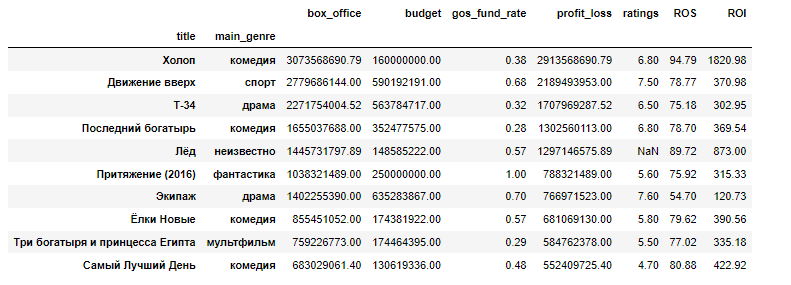
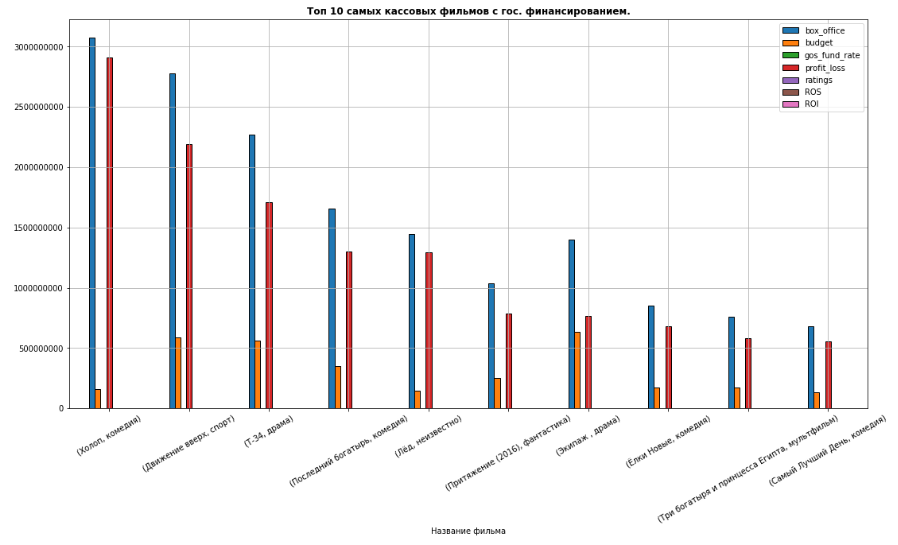

**Ключевые выводы по топ 10 убыточным фильма:**
- Самый <u>убыточный</u> фильм "Тайна Печати Дракона";
- Прослеживается <u>положительная</u> корреляция между долей участия государства в финансировании и рентабельности продаж (`0.5`), а также рентабельности инвестиций (`0.57`). Чем меньше гос-во участвует, тем менне успешен фильм в финансовом плане;
- Средний рейтинг - `6`, Медиана - `5.9`;
- Матильда (жанр фэнтези)?.

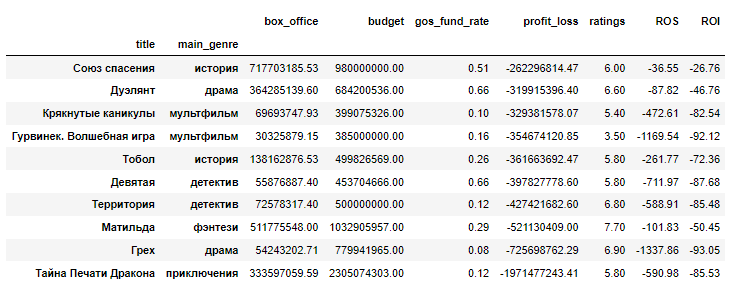
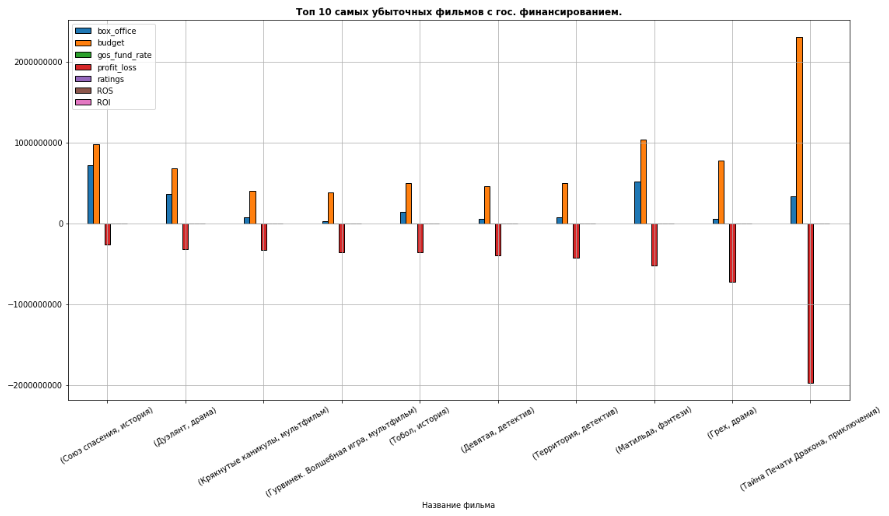

**ТОП 10 самых рейтинговых фильмов**
- Среди фильмов с высоким рейтингом самым прибыльным стал фильм **Миллиард**, рейтинг **8.2**.
- Среди фильмов с высоким рейтингом самым убыточным стал фильм **Простая история**, рейтинг **7.8**.

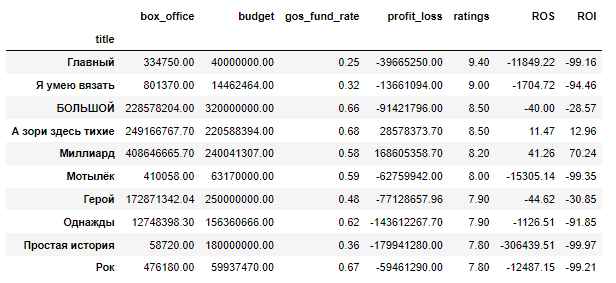
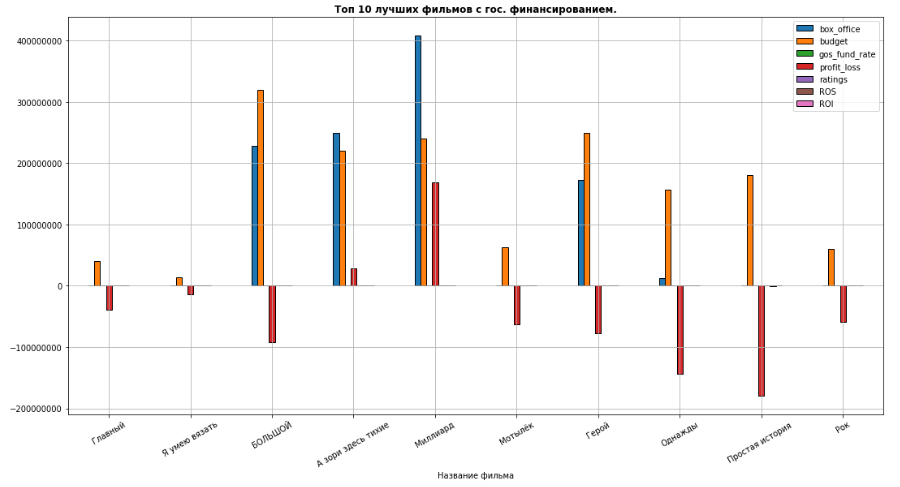

[Вернуться в начало тетрадки](#head)